# Расчёт полей тороидально намагниченного цилиндра с намагниченностью обратной радиусу в опыте Дейны (опыт Николаева номер 31)

А.Ю.Дроздов

С.А. Дейна в ролике "Магниты Второе магнитное поле Николаева 4" https://www.youtube.com/watch?v=A2Lx-ONcMow (Текстовое писание ролика https://drive.google.com/file/d/0B-MmD2EU7WEbV3VCR0NvLXl6Rm8/view) представил опыт с взаимодействием двух соосно расположенных цилиндров со сверлением, тороидально намагничиваемых путём пропускания тока по проводу проходящему внутри сверлений.

Сама идея этого опыта принадлежит Г.Николаеву, который утверждал, что притяжения цилиндров противоречит классической электродинамике и для обьяснения притяжения цилиндров постулировал существование продольной силы Николаева, кроме традиционной силы Лоренца

В данной же работе, пользуясь матаппаратом классической электродинамики, я представляю расчёт полей тороидально намагниченного цилиндра, а также вычисляю силу их взаимодействия: силу Лоренца и силу Николаева. 

Вводим цилиндрическую систему координат, в которой (вслед за Таммом) индексом $j$ обозначаем координаты молекулярных токов намагниченного цилиндра, а индексом $a$ обозначаем координаты точек наблюдения

In [1]:
zj = var("zj")
za = var("za")
rj = var("rj")
ra = var("ra")
phi = var("phi")

assume(rj>0)
assume(ra>0)

Введём переменные - пределы интегрирования по координатам молекулярных токов

In [2]:
zj1 = var("zj1") # левый торец цилиндра
zj2 = var("zj2") # правый торец цилиндра

rj1 = var("rj1") # радиус внутренней поверхности (сверления) цилиндра
rj2 = var("rj2") # радиус внешней цилиндрической поверхности цилиндра

Задаём размеры цилиндров в сантиметрах. Размеры цилиндров: диаметр 30 мм, длина 30 мм, диаметр внутреннего сверления 6 мм.

In [3]:
# sizes of cylinders in Deyna's video
Zj1 = -1.5
Zj2 =  1.5
Rj1 = 0.3
Rj2 = 1.5

Ra1 = Rj1
Ra2 = Rj2

DZ = Zj2 - Zj1

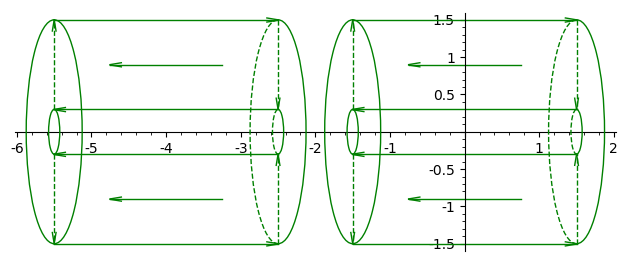

In [4]:
line_thick = 0.005
arr_l = 0.15
arr_h = 0.025
color = "green"

def draw_cylinder(z0 = 0):
    p  = line ([[z0 + Zj1,      Rj2                 ], [z0 + Zj2,Rj2]], color = color)
    p += line ([[z0 + Zj2-arr_l,Rj2+arr_h           ], [z0 + Zj2,Rj2]], color = color)
    p += line ([[z0 + Zj2-arr_l,Rj2-arr_h-line_thick], [z0 + Zj2,Rj2-line_thick]], color = color)

    p += line ([[z0 + Zj2,      Rj2                 ], [z0 + Zj2,Rj1]], color = color, linestyle="dashed")
    p += line ([[z0 + Zj2-arr_h,Rj1+arr_l           ], [z0 + Zj2,Rj1]], color = color)
    p += line ([[z0 + Zj2+arr_h,Rj1+arr_l           ], [z0 + Zj2,Rj1]], color = color)

    p += line ([[z0 + Zj2,      Rj1                 ], [z0 + Zj1,Rj1]], color = color)
    p += line ([[z0 + Zj1+arr_l,Rj1+arr_h           ], [z0 + Zj1,Rj1]], color = color)
    p += line ([[z0 + Zj1+arr_l,Rj1-arr_h-line_thick], [z0 + Zj1,Rj1-line_thick]], color = color)

    p += line ([[z0 + Zj1,      Rj1                 ], [z0 + Zj1,Rj2]], color = color, linestyle="dashed")
    p += line ([[z0 + Zj1-arr_h,Rj2-arr_l           ], [z0 + Zj1,Rj2]], color = color)
    p += line ([[z0 + Zj1+arr_h,Rj2-arr_l           ], [z0 + Zj1,Rj2]], color = color)

    p += line ([[z0 + Zj2-DZ/4,      (Rj1+Rj2)/2                 ], [z0 + Zj1+DZ/4,(Rj1+Rj2)/2]], color = color)
    p += line ([[z0 + Zj1+DZ/4+arr_l,(Rj1+Rj2)/2+arr_h           ], [z0 + Zj1+DZ/4,(Rj1+Rj2)/2]], color = color)
    p += line ([[z0 + Zj1+DZ/4+arr_l,(Rj1+Rj2)/2-arr_h-line_thick], [z0 + Zj1+DZ/4,(Rj1+Rj2)/2-line_thick]], color = color)
    
    
    p += line ([[z0 + Zj1,      -Rj2                 ], [z0 + Zj2,-Rj2]], color = color)
    p += line ([[z0 + Zj2-arr_l,-Rj2+arr_h           ], [z0 + Zj2,-Rj2]], color = color)
    p += line ([[z0 + Zj2-arr_l,-Rj2-arr_h-line_thick], [z0 + Zj2,-Rj2-line_thick]], color = color)

    p += line ([[z0 + Zj2,      -Rj2                 ], [z0 + Zj2,-Rj1]], color = color, linestyle="dashed")
    p += line ([[z0 + Zj2-arr_h,-Rj1-arr_l           ], [z0 + Zj2,-Rj1]], color = color)
    p += line ([[z0 + Zj2+arr_h,-Rj1-arr_l           ], [z0 + Zj2,-Rj1]], color = color)


    p += line ([[z0 + Zj2,      -Rj1                 ], [z0 + Zj1,-Rj1]], color = color)
    p += line ([[z0 + Zj1+arr_l,-Rj1+arr_h           ], [z0 + Zj1,-Rj1]], color = color)
    p += line ([[z0 + Zj1+arr_l,-Rj1-arr_h-line_thick], [z0 + Zj1,-Rj1-line_thick]], color = color)

    p += line ([[z0 + Zj1,      -Rj1                 ], [z0 + Zj1,-Rj2]], color = color, linestyle="dashed")
    p += line ([[z0 + Zj1-arr_h,-Rj2+arr_l           ], [z0 + Zj1,-Rj2]], color = color)
    p += line ([[z0 + Zj1+arr_h,-Rj2+arr_l           ], [z0 + Zj1,-Rj2]], color = color)

    p += line ([[z0 + Zj2-DZ/4,      -(Rj1+Rj2)/2                 ], [z0 + Zj1+DZ/4,-(Rj1+Rj2)/2]], color = color)
    p += line ([[z0 + Zj1+DZ/4+arr_l,-(Rj1+Rj2)/2+arr_h           ], [z0 + Zj1+DZ/4,-(Rj1+Rj2)/2]], color = color)
    p += line ([[z0 + Zj1+DZ/4+arr_l,-(Rj1+Rj2)/2-arr_h-line_thick], [z0 + Zj1+DZ/4,-(Rj1+Rj2)/2-line_thick]], color = color)

    p += ellipse((z0 + Zj1, 0), (Rj1)/4, (Rj1), color = color)
    p += ellipse((z0 + Zj1, 0), (Rj2)/4, (Rj2), color = color)

    p += arc((z0 + Zj2, 0), (Rj1)/4, (Rj1), sector=(-pi/2,pi/2), color = color)
    p += arc((z0 + Zj2, 0), (Rj2)/4, (Rj2), sector=(-pi/2,pi/2), color = "green")

    p += arc((z0 + Zj2, 0), (Rj1)/4, (Rj1), sector=(pi/2,3*pi/2), color = color, linestyle="dashed")
    p += arc((z0 + Zj2, 0), (Rj2)/4, (Rj2), sector=(pi/2,3*pi/2), color = color, linestyle="dashed")
    
    return p

p = draw_cylinder()
p += draw_cylinder(z0 = -DZ-1.0)
p.show(aspect_ratio = 1, axes=True)

Следуя Тамму, обозначаем вектор намагниченности цилиндра через $I$. 
В данном расчёте предположим, что цилиндр имеет только $\varphi$-тую компоненту намагниченности и величина этой намагниченности $I_{\varphi}$ inverse to the radius.

$J$ ток on the wire

$\oint {\vec  H}\cdot {\vec  {dl}}={\frac  {4\pi}{c}}J$

$2\,\pi\,r\ {H_{\varphi}}_{wire}={\frac  {4\pi}{c}}J$

${H_{\varphi}}_{wire}={\frac  {2}{c\,r}}J$

$I_{\varphi} = \kappa\,{H_{\varphi}}_{wire}$

$I_{\varphi} = \kappa\,{\frac  {2}{c\,r}}J$

Для поверхностного тока у Тамма можно почерпнуть формулу $js = c \cdot [I \times n]$ (параграф 61. Векторный потенциал магнитного поля при наличии магнентиков. Средняя плотность объёмных и поверхностных токов. Уравнение 61.10 - случай для вакуума)
Для объёмного тока - формулу $jv = c \cdot rot(I)$ (там же, уравнение 61.9)

$js = c \cdot [I \times n] =  \kappa\,{\frac  {2}{r}}J$


In [5]:
c = var("c")                   # скорость света
kappa = var("kappa")           # Магнитная восприимчивость
J = var("J")                   # ток
js(J, kappa, r) = 2*J*kappa/r  # плотность поверхностного тока на внутренней и внешней цилиндрической поверхностях цилиндра
                               # js(rj1) = - 2*J*kappa/rji
                               # js(rj2) = + 2*J*kappa/rj2
jt(J, kappa, r) = 2*J*kappa/r  # плотность поверхностного тока на торцах цилиндра
                               # jt(rj) = + 2*J*kappa/rj # zj1
                               # jt(rj) = - 2*J*kappa/rj # zj2
jv(J, kappa, r) = 0            # плотность объёмного тока

In [6]:
z_j = var("z_j")
z_a = var("z_a")
r_j = var("r_j")
r_a = var("r_a")
I_0 = var("I_0")  # намагниченность

Зная среднюю плотность объёмных и поверхностных токов можно вычислить векторный потенциал магнитного поля тороидально намагниченного цилиндра. Следуя Тамму

$A=\frac{1}{c}\int{\frac{j_v}{R}}d{V}+\frac{1}{c}\int{\frac{j_s}{R}}d{S}$

Распишем в этом интеграле отдельно интегрирование по торцам и по цилиндрическим поверхностям

$A=\frac{1}{c}\int{\frac{j_v}{R}}d{V}+\frac{1}{c}\int{\frac{j_s}{R}}d{S_{s}}+\frac{1}{c}\int{\frac{j_t}{R}}d{S_{t}}$

В цилиндрической системе координат интегрирование по объёму цилиндра

$A_V=\frac{1}{c}\int{\frac{j_v}{R}}d{V}=\frac{1}{c}\int\limits_{{{r}_{j}}}\int\limits_{{{\varphi}_{j}}}\int\limits_{{{z}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{z}_{j}}d{{\varphi }_{j}}d{{r}_{j}}$

интегрирование по цилиндрическим поверхностям цилиндра

$A_S=\frac{1}{c}\int{\frac{j_s}{R}}d{S_{s}}=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}\int\limits_{{{z}_{j}}}
{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{z}_{j}}d{{\varphi }_{j}}$

интегрирование по торцевым поверхностям цилиндра

$A_T=\frac{1}{c}\int{\frac{j_t}{R}}d{S_{t}}=\frac{1}{c}\int\limits_{{{r}_{j}}}\int\limits_{{{\varphi}_{j}}}
{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}d{{r}_{j}}$

Во всех этих трёх интегралах нам потребуется интеграл $\int\limits_{0}^{2\pi}{\frac{1}{R}}d{\varphi}$ - обратного расстояния между точкой истока и точкой наблюдения в цилиндрической системе координат, проинтегрированный по координатному углу phi точек истока от нуля до $2\pi$

$R=\sqrt{(r_j\,sin(\varphi_j)-r_a\,sin(\varphi_a))^2+(r_j\,cos(\varphi_j)-r_a\,cos(\varphi_a))^2+(z_j-z_a)^2}$

Ввиду цилиндрической симметрии и ввиду того что

$\frac{\partial A}{\partial \varphi_a} = 0$

нам не потребуется дифференцирование векторного потенциала по $\varphi_a$ координате точек наблюдения, можно упростить расчёт полагая, что $\varphi_a = 0$, тогда 

$R=\sqrt{r_j^2+r_a^2-2\,r_j\,r_a\,cos(\varphi_j)+(z_j-z_a)^2}$

В таком случае интеграл 
$IR_{\varphi}=\int\limits_{0}^{2\pi}{\frac{1}{R}}d{\varphi_j}$
выражается через полный эллиптический интеграл первого рода следующим образом:

In [7]:
from IPython.display import display, Math, Latex

rja2   = lambda rj, ra, zj, za : (rj-ra)^2+(zj-za)^2
module = lambda rj, ra, zj, za : - 4*rj*ra / rja2(rj, ra, zj, za)
IRphi_ = lambda rj, ra, zj, za : 4*elliptic_kc(module(rj, ra, zj, za)) / sqrt(rja2(rj, ra, zj, za))
display(Math("$$IR_{\\varphi} =" + latex(IRphi_(r_j, r_a, z_j, z_a)) + "$$"))

<IPython.core.display.Math object>

In [8]:
phi_j = var("phi_j")
Rja2 = lambda rj, ra, zj, za, phi_j : rj^2 + ra^2 - 2*rj*ra*cos(phi_j) + (zj-za)^2
one_per_R  = lambda rj, ra, zj, za, phi_j : 1 / sqrt(Rja2(rj, ra, zj, za, phi_j))
IRphi = lambda rj, ra, zj, za : integrate(one_per_R(rj, ra, zj, za, phi_j),(phi_j,0,2*pi))
display(Math("$$IR_{\\varphi} =" + latex(IRphi(r_j, r_a, z_j, z_a)) + "$$"))

<IPython.core.display.Math object>

In [9]:
z_j1 = var("z_j1") # левый торец цилиндра
z_j2 = var("z_j2") # правый торец цилиндра

r_j1 = var("r_j1") # радиус внутренней поверхности (сверления) цилиндра
r_j2 = var("r_j2") # радиус внешней цилиндрической поверхности цилиндра

вспомогательные переменные для интегрирования источников векторного потенциала по поверхностным и объёмным токам

Интеграл по ${\varphi}_{j}$ векторного потенциала, создаваемого элементарным объёмом ${{r}_{j}}\,d{{\varphi}_{j}}d{r_j}d{z_j}$ цилиндра

$A_v=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi}_{j}}$

Интеграл по ${\varphi}_{j}$ векторного потенциала, создаваемого элементом площади ${{r}_{j}}\,d{{\varphi}_{j}}d{z_j}$ цилиндрической поверхности цилиндра

$A_s=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi}_{j}}$

Интеграл по ${\varphi}_{j}$ векторного потенциала, создаваемого элементом площади ${{r}_{j}}\,d{{\varphi}_{j}}d{r_j}$  торцевой поверхности цилиндра

$A_t=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [10]:
As = lambda J, c, kappa, rj, ra, zj, za, phi_j : one_per_R(rj, ra, zj, za, phi_j) * js(J, kappa, rj)*rj/c
display(Math("$$A_s =" + latex(As(J, c, kappa, r_j, r_a, z_j, z_a, phi_j)) + "$$"))

At = lambda J, c, kappa, rj, ra, zj, za, phi_j : one_per_R(rj, ra, zj, za, phi_j) * jt(J, kappa, rj)*rj/c * cos(phi_j)
display(Math("$$A_t =" + latex(At(J, c, kappa, r_j, r_a, z_j, z_a, phi_j)) + "$$"))

Av = lambda J, c, kappa, rj, ra, zj, za, phi_j : one_per_R(rj, ra, zj, za, phi_j) * jv(J, kappa, rj)*rj/c
display(Math("$$A_v =" + latex(Av(J, c, kappa, r_j, r_a, z_j, z_a, phi_j)) + "$$"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Рассчитаем производную векторного потенциала, создаваемого торцевым поверхностным током, по $z_a$ координате точки наблюдения $\frac{\partial}{\partial z_a} A_t = \frac{\partial}{\partial z_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [11]:
At_diff_za_ = lambda J, c, kappa, rj, ra, zj, za, phi_j : diff(At(J, c, kappa, rj, ra, zj, za, phi_j), za)

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током, заключённом в плоском кольце толщиной $dr_j$ с радиусом $r_j$, по $z_a$ координате точки наблюдения

In [12]:
display(Math("$$\\frac{\\partial}{\\partial z_a} A_t(J, c, \\kappa, r_j, r_a, z_j, z_a, phi_j) = " + latex(At_diff_za_(J, c, kappa, rj, ra, zj, za, phi_j)) + "$$"))

<IPython.core.display.Math object>

In [13]:
exec(preparse("At_diff_za = lambda J, c, kappa, rj, ra, zj, za, phi_j : " + str(At_diff_za_(J, c, kappa, rj, ra, zj, za, phi_j))))

In [14]:
print (At_diff_za (J, c, kappa, rj, ra, zj, za, phi_j))

-2*J*kappa*(za - zj)*cos(phi_j)/((-2*ra*rj*cos(phi_j) + ra^2 + rj^2 + (za - zj)^2)^(3/2)*c)


In [15]:
display(Math(latex(At_diff_za (J, c, kappa, r_j, r_a, z_j, z_a, phi_j))))

<IPython.core.display.Math object>

Учитывая положительное направление поверхностного тока в левом торце и отрицательное направление поверхностного тока в правом торце составим сумму полученной производной для обоих торцов

In [16]:
At2_diff_za_ = lambda J, c, kappa, rj, ra, zj1, zj2, za, phi_j : At_diff_za(J, c, kappa, rj, ra, zj1, za, phi_j) - At_diff_za(J, c, kappa, rj, ra, zj2, za, phi_j)

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током обоих торцов, заключённом в двух плоских кольцах толщиной $dr_{j}$ и радиуса $r_{j}$, по $z$ координате точки наблюдения

In [17]:
exec(preparse("At2_diff_za = lambda J, c, kappa, rj, ra, zj1, zj2, za, phi_j : " + str(At2_diff_za_(J, c, kappa, rj, ra, zj1, zj2, za, phi_j))))

In [18]:
print(At2_diff_za (J, c, kappa, rj, ra, zj1, zj2, za, phi_j))

-2*J*kappa*(za - zj1)*cos(phi_j)/((-2*ra*rj*cos(phi_j) + ra^2 + rj^2 + (za - zj1)^2)^(3/2)*c) + 2*J*kappa*(za - zj2)*cos(phi_j)/((-2*ra*rj*cos(phi_j) + ra^2 + rj^2 + (za - zj2)^2)^(3/2)*c)


In [19]:
display(Math(latex(At2_diff_za (J, c, kappa, r_j, r_a, z_j1, z_j2, z_a, phi_j))))

<IPython.core.display.Math object>

Рассчитаем производную векторного потенциала, создаваемого торцевым поверхностным током, по $r_a$ координате точки наблюдения $\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_t\right) = \frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,\int\limits_{{{\varphi}_{j}}}
{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}\right)$

In [20]:
At_ra_diff_ra_div_ra_ = lambda J, c, kappa, rj, ra, zj, za, phi_j : (ra*At(J, c, kappa, rj, ra, zj, za, phi_j)).diff(ra)/ra

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током, заключённом в плоском кольце толщиной $dr_j$ с радиусом $r_j$, по $r_a$ координате точки наблюдения

In [21]:
display(Math("$$\\frac{1}{r_a}\\frac{\\partial}{\\partial r_a}\\left(r_a\\, A_t(J, c, \\kappa, r_j, r_a, z_j, z_a, phi_j)\\right) = " + latex(At_ra_diff_ra_div_ra_(J, c, kappa, rj, ra, zj, za, phi_j)) + "$$"))

<IPython.core.display.Math object>

In [22]:
exec(preparse("At_ra_diff_ra_div_ra = lambda J, c, kappa, rj, ra, zj, za, phi_j : " + str(At_ra_diff_ra_div_ra_(J, c, kappa, rj, ra, zj, za, phi_j))))

In [23]:
print (At_ra_diff_ra_div_ra (J, c, kappa, rj, ra, zj, za, phi_j))

2*((rj*cos(phi_j) - ra)*J*kappa*ra*cos(phi_j)/((-2*ra*rj*cos(phi_j) + ra^2 + rj^2 + (za - zj)^2)^(3/2)*c) + J*kappa*cos(phi_j)/(sqrt(-2*ra*rj*cos(phi_j) + ra^2 + rj^2 + (za - zj)^2)*c))/ra


In [24]:
display(Math(latex(At_ra_diff_ra_div_ra (J, c, kappa, r_j, r_a, z_j, z_a, phi_j))))

<IPython.core.display.Math object>

Учитывая положительное направление поверхностного тока в левом торце и отрицательное направление поверхностного тока в правом торце составим сумму полученной производной для обоих торцов

In [25]:
At2_ra_diff_ra_div_ra_ = lambda J, c, kappa, rj, ra, zj1, zj2, za, phi_j : At_ra_diff_ra_div_ra_(J, c, kappa, rj, ra, zj1, za, phi_j) - At_ra_diff_ra_div_ra_(J, c, kappa, rj, ra, zj2, za, phi_j)

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током обоих торцов, заключённом в двух плоских кольцах толщиной $dr_{j}$ и радиуса $r_{j}$, по $r$ координате точки наблюдения

In [26]:
exec(preparse("At2_ra_diff_ra_div_ra = lambda J, c, kappa, rj, ra, zj1, zj2, za, phi_j : " + str(At2_ra_diff_ra_div_ra_(J, c, kappa, rj, ra, zj1, zj2, za, phi_j))))

In [27]:
print(At2_ra_diff_ra_div_ra (J, c, kappa, rj, ra, zj1, zj2, za, phi_j))

2*((rj*cos(phi_j) - ra)*J*kappa*ra*cos(phi_j)/((-2*ra*rj*cos(phi_j) + ra^2 + rj^2 + (za - zj1)^2)^(3/2)*c) + J*kappa*cos(phi_j)/(sqrt(-2*ra*rj*cos(phi_j) + ra^2 + rj^2 + (za - zj1)^2)*c))/ra - 2*((rj*cos(phi_j) - ra)*J*kappa*ra*cos(phi_j)/((-2*ra*rj*cos(phi_j) + ra^2 + rj^2 + (za - zj2)^2)^(3/2)*c) + J*kappa*cos(phi_j)/(sqrt(-2*ra*rj*cos(phi_j) + ra^2 + rj^2 + (za - zj2)^2)*c))/ra


In [28]:
display(Math(latex(At2_ra_diff_ra_div_ra (J, c, kappa, r_j, r_a, z_j1, z_j2, z_a, phi_j))))

<IPython.core.display.Math object>

Рассчитаем производную векторного потенциала, создаваемого поверхностным током цилиндрической поверхности, по $r_a$ координате точки наблюдения $\frac{\partial}{\partial r_a} A_s = \frac{\partial}{\partial r_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [29]:
As_diff_ra_ = lambda J, c, kappa, rj, ra, zj, za, phi_j : As(J, c, kappa, rj, ra, zj, za, phi_j).diff(ra)

Итак, производная векторного потенциала, создаваемого поверхностным током цилиндрической поверхности радиуса $r_{j}$, заключённой в поверхностном кольце шириной $dz_{j}$ c координатой $z_{j}$, по $r$ координате точки наблюдения

In [30]:
display(Math("$$\\frac{\\partial}{\\partial r_a} A_s (J, c, \\kappa, r_j, r_a, z_j, z_a, phi_j) = " + latex(As_diff_ra_(J, c, kappa, rj, ra, zj, za, phi_j)) + "$$"))

<IPython.core.display.Math object>

In [31]:
exec(preparse("As_diff_ra = lambda J, c, kappa, rj, ra, zj, za, phi_j : " + str(As_diff_ra_(J, c, kappa, rj, ra, zj, za, phi_j))))

In [32]:
print(As_diff_ra (J, c, kappa, rj, ra, zj, za, phi_j))

2*(rj*cos(phi_j) - ra)*J*kappa/((-2*ra*rj*cos(phi_j) + ra^2 + rj^2 + (za - zj)^2)^(3/2)*c)


In [33]:
display(Math(latex(As_diff_ra (J, c, kappa, r_j, r_a, z_j, z_a, phi_j))))

<IPython.core.display.Math object>

Учитывая отрицательное направление поверхностного тока на внутренней цилиндрической поверхности (в сверлении) и положительное направление поверхностного тока на внешней цилиндрической поверхности составим сумму полученной производной для обоих цилиндрических поверхностей

In [34]:
As2_diff_ra_ = lambda J, c, kappa, rj1, rj2, ra, zj, za, phi_j : - As_diff_ra_(J, c, kappa, rj1, ra, zj, za, phi_j) + As_diff_ra_(J, c, kappa, rj2, ra, zj, za, phi_j)


Итак, производная векторного потенциала, создаваемого поверхностными токами обоих цилиндрических поверхностей, заключённом в двух поверхностных кольцах шириной $dz_{j}$ c координатой $z_{j}$, по $r$ координате точки наблюдения

In [35]:
exec(preparse("As2_diff_ra = lambda J, c, kappa, rj1, rj2, ra, zj, za, phi_j : " + str(As2_diff_ra_(J, c, kappa, rj1, rj2, ra, zj, za, phi_j))))

In [36]:
print (As2_diff_ra (J, c, kappa, rj1, rj2, ra, zj, za, phi_j))

-2*(rj1*cos(phi_j) - ra)*J*kappa/((-2*ra*rj1*cos(phi_j) + ra^2 + rj1^2 + (za - zj)^2)^(3/2)*c) + 2*(rj2*cos(phi_j) - ra)*J*kappa/((-2*ra*rj2*cos(phi_j) + ra^2 + rj2^2 + (za - zj)^2)^(3/2)*c)


In [37]:
display(Math(latex(As2_diff_ra (J, c, kappa, r_j1, r_j2, r_a, z_j, z_a, phi_j))))

<IPython.core.display.Math object>

Рассчитаем производную векторного потенциала, создаваемого поверхностным током цилиндрической поверхности, по $z_a$ координате точки наблюдения $\frac{\partial}{\partial z_a} A_s = \frac{\partial}{\partial z_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [38]:
As_diff_za_ = lambda J, c, kappa, rj, ra, zj, za, phi_j : As(J, c, kappa, rj, ra, zj, za, phi_j).diff(za)

Итак, производная векторного потенциала, создаваемого поверхностным током цилиндрической поверхности радиуса $r_{j}$, заключённой в поверхностном кольце шириной $dz_{j}$ c координатой $z_{j}$, по $z$ координате точки наблюдения

In [39]:
display(Math("$$\\frac{\\partial}{\\partial z_a} A_s (J, c, \\kappa, r_j, r_a, z_j, z_a, phi_j) = " + latex(As_diff_za_(J, c, kappa, rj, ra, zj, za, phi_j)) + "$$"))

<IPython.core.display.Math object>

In [40]:
exec(preparse("As_diff_za = lambda J, c, kappa, rj, ra, zj, za, phi_j : " + str(As_diff_za_(J, c, kappa, rj, ra, zj, za, phi_j))))

In [41]:
print(As_diff_za (J, c, kappa, rj, ra, zj, za, phi_j))

-2*J*kappa*(za - zj)/((-2*ra*rj*cos(phi_j) + ra^2 + rj^2 + (za - zj)^2)^(3/2)*c)


In [42]:
display(Math(latex(As_diff_za (J, c, kappa, r_j, r_a, z_j, z_a, phi_j))))

<IPython.core.display.Math object>

Учитывая отрицательное направление поверхностного тока на внутренней цилиндрической поверхности (в сверлении) и положительное направление поверхностного тока на внешней цилиндрической поверхности составим сумму полученной производной для обоих цилиндрических поверхностей

In [43]:
As2_diff_za_ = lambda J, c, kappa, rj1, rj2, ra, zj, za, phi_j : - As_diff_za_(J, c, kappa, rj1, ra, zj, za, phi_j) + As_diff_za_(J, c, kappa, rj2, ra, zj, za, phi_j)


Итак, производная векторного потенциала, создаваемого поверхностными токами обоих цилиндрических поверхностей, заключённом в двух поверхностных кольцах шириной $dz_{j}$ c координатой $z_{j}$, по $z$ координате точки наблюдения

In [44]:
exec(preparse("As2_diff_za = lambda J, c, kappa, rj1, rj2, ra, zj, za, phi_j : " + str(As2_diff_za_(J, c, kappa, rj1, rj2, ra, zj, za, phi_j))))

In [45]:
print (As2_diff_za (J, c, kappa, rj1, rj2, ra, zj, za, phi_j))

2*J*kappa*(za - zj)/((-2*ra*rj1*cos(phi_j) + ra^2 + rj1^2 + (za - zj)^2)^(3/2)*c) - 2*J*kappa*(za - zj)/((-2*ra*rj2*cos(phi_j) + ra^2 + rj2^2 + (za - zj)^2)^(3/2)*c)


In [46]:
display(Math(latex(As2_diff_za (J, c, kappa, r_j1, r_j2, r_a, z_j, z_a, phi_j))))

<IPython.core.display.Math object>

Теперь необходимо составить производную векторного потенциала, создаваемого объёмным током поверхности, по $r_a$ координате точки наблюдения $\frac{\partial}{\partial r_a} A_v = \frac{\partial}{\partial r_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [47]:
Av_diff_ra_ = lambda J, c, kappa, rj, ra, zj, za, phi_j : Av(J, c, kappa, rj, ra, zj, za, phi_j).diff(ra)

Итак, производная векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_{j}$ c координатой $z_{j}$ и толщиной $dr_{j}$ и радиуса $r_j$, по $r$ координате точки наблюдения

In [48]:
display(Math("$$\\frac{\\partial}{\\partial r_a} A_v (J, c, \\kappa, r_j, r_a, z_j, z_a, phi_j) =" + latex(Av_diff_ra_(J, c, kappa, rj, ra, zj, za, phi_j)) + "$$"))

<IPython.core.display.Math object>

In [49]:
exec(preparse("Av_diff_ra = lambda J, c, kappa, rj, ra, zj, za, phi_j : " + str(Av_diff_ra_(J, c, kappa, rj, ra, zj, za, phi_j))))

In [50]:
print (Av_diff_ra (J, c, kappa, rj, ra, zj, za, phi_j))

0


In [51]:
display(Math(latex(Av_diff_ra (J, c, kappa, r_j, r_a, z_j, z_a, phi_j))))

<IPython.core.display.Math object>

Теперь необходимо составить производную векторного потенциала, создаваемого объёмным током поверхности, по $z_a$ координате точки наблюдения $\frac{\partial}{\partial z_a} A_v = \frac{\partial}{\partial z_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [52]:
Av_diff_za_ = lambda J, c, kappa, rj, ra, zj, za, phi_j : Av(J, c, kappa, rj, ra, zj, za, phi_j).diff(za)


Итак, производная векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_{j}$ c координатой $z_{j}$ и толщиной $dr_{j}$ и радиуса $r_j$, по $z$ координате точки наблюдения

In [53]:
display(Math("$$\\frac{\\partial}{\\partial z_a} A_v (J, c, \\kappa, r_j, r_a, z_j, z_a, phi_j) =" + latex(Av_diff_za_(J, c, kappa, rj, ra, zj, za, phi_j)) + "$$"))

<IPython.core.display.Math object>

In [54]:
exec(preparse("Av_diff_za = lambda J, c, kappa, rj, ra, zj, za, phi_j : " + str(Av_diff_za_(J, c, kappa, rj, ra, zj, za, phi_j))))

In [55]:
print (Av_diff_za (J, c, kappa, rj, ra, zj, za, phi_j))

0


In [56]:
display(Math(latex(Av_diff_za (J, c, kappa, r_j, r_a, z_j, z_a, phi_j))))

<IPython.core.display.Math object>

Далее нам необходимо определить собственную функцию для численного интегрирования

In [57]:
def get_integrand_view(f):
    return f(x)

class my_dummy_integral:
    f = None
    a = None
    b = None
    def __init__(self, f, a, b):
        print ("my_dummy_integral ", f, a, b)
        self.f = f
        self.a = a
        self.b = b

def num_int(f, a, b):
    from scipy import integrate

    to_call_integration = True

    if type(f) is my_dummy_integral:
        to_call_integration = False

    import inspect
    stack = inspect.stack()
    for frame in stack:
        func_name = frame[3]
        # print ("func_name = ", func_name)
        if ('get_integrand_view' == func_name):
            to_call_integration = False
            break;

    if not to_call_integration:
        return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a = ", a)
        print ("b = ", b)

        raise ex

        integral = numerical_integral(f, a, b)

        print ("integral = ", integral)

        result = integral[0]
        print ("result = ", result)
        return result


Теперь необходимо производную векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_j$ c координатой $z_j$ и толщиной $dr_j$ и радиуса $r_j$, по $r$ координате точки наблюдения - проинтегрировать по радиусу точек истока от $r_{j1}$ до $r_{j2}$

$\frac{\partial}{\partial r_a}\int\limits_{r_{j1}}^{r_{j2}}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}d{{r}_{j}}$

In [58]:
AV_diff_ra_int_phi = lambda J, c, kappa, rj, ra, zj, za : num_int(lambda phi_j : Av_diff_ra(J, c, kappa, rj, ra, zj, za, phi_j), 0, 2*pi)

In [59]:
AV_diff_ra = lambda J, c, kappa, rj1, rj2, ra, zj, za : num_int(lambda rj : AV_diff_ra_int_phi(J, c, kappa, rj, ra, zj, za), rj1, rj2)

Теперь необходимо производную векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_j$ c координатой $z_j$ и толщиной $dr_j$ и радиуса $r_j$, по $z$ координате точки наблюдения - проинтегрировать по радиусу точек истока от $r_{j1}$ до $r_{j2}$

$\frac{\partial}{\partial z_a}\int\limits_{r_{j1}}^{r_{j2}}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}d{{r}_{j}}$

In [60]:
AV_diff_za_int_phi = lambda J, c, kappa, rj, ra, zj, za : num_int(lambda phi_j : Av_diff_za(J, c, kappa, rj, ra, zj, za, phi_j), 0, 2*pi)

In [61]:
AV_diff_za = lambda J, c, kappa, rj1, rj2, ra, zj, za : num_int(lambda rj : AV_diff_za_int_phi(J, c, kappa, rj, ra, zj, za), rj1, rj2)

Производим подстановку размеров координат правого цилиндра - источника векторного потенциала в формулы производных векторного потенциала

In [62]:
# численные значения в системе гаусса
J_d = 250 * 3*10^9      # Ток в цепи достигает 250 А
kappa_d = 1100 / (4*pi) # Магнитная восприимчивость https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D0%B3%D0%BD%D0%B8%D1%82%D0%BD%D0%B0%D1%8F_%D0%B2%D0%BE%D1%81%D0%BF%D1%80%D0%B8%D0%B8%D0%BC%D1%87%D0%B8%D0%B2%D0%BE%D1%81%D1%82%D1%8C
c_d = 299792458 * 100

In [63]:
At_diff_za_subs_zj = lambda rj, ra, za : num_int(lambda phi_j : At2_diff_za(J_d, c_d, kappa_d, rj, ra, Zj1, Zj2, za, phi_j), 0, 2*pi)

In [64]:
At_ra_diff_ra_div_ra_subs_zj = lambda rj, ra, za : num_int(lambda phi_j : At2_ra_diff_ra_div_ra (J_d, c_d, kappa_d, rj, ra, Zj1, Zj2, za, phi_j), 0, 2*pi)

In [65]:
As_diff_ra_subs_rj = lambda ra, zj, za : num_int(lambda phi_j : As2_diff_ra(J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za, phi_j), 0, 2*pi)

In [66]:
As_diff_za_subs_rj = lambda ra, zj, za : num_int(lambda phi_j : As2_diff_za(J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za, phi_j), 0, 2*pi)

In [67]:
Av_diff_ra_subs_rj = lambda ra, zj, za : AV_diff_ra (J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za)

In [68]:
Av_diff_za_subs_rj = lambda ra, zj, za : AV_diff_za (J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za)

Определяем функцию расчёта векторного магнитного поля $H$ (компонента $\varphi$)

$H_{\varphi}=\frac{\partial}{\partial z_a}A_T - \frac{\partial}{\partial r_a}(A_S+A_V)$

In [69]:
def calc_H_phi(Za, Ra):
    At_diff_za_subs_zj_za_ra = lambda rj : At_diff_za_subs_zj(rj, Ra, Za)
    As_diff_ra_subs_rj_za_ra = lambda zj : As_diff_ra_subs_rj(Ra, zj, Za)

    #At_diff_za_num_int = At_diff_za_subs_zj_za_ra(rj).nintegral(rj, Rj1, Rj2)
    #As_diff_ra_num_int = As_diff_ra_subs_rj_za_ra(zj).nintegral(zj, Zj1, Zj2)
    At_diff_za_num_int = num_int( lambda rj : At_diff_za_subs_zj_za_ra(rj), Rj1, Rj2)
    As_diff_ra_num_int = num_int( lambda zj : As_diff_ra_subs_rj_za_ra(zj), Zj1, Zj2)
    Av_diff_ra_num_int = num_int( lambda zj : Av_diff_ra_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_ra_num_int = As_diff_ra_num_int + Av_diff_ra_num_int

    H_phi_t = At_diff_za_num_int
    H_phi_sv = - As_v_diff_ra_num_int

    H_phi = H_phi_t + H_phi_sv
    print ("Ra =", Ra, "Za =", Za, "H_phi_t =", H_phi_t)
    print ("Ra =", Ra, "Za =", Za, "H_phi_sv =", H_phi_sv)
    print ("Ra =", Ra, "Za =", Za, "H_phi =", H_phi)

    return (H_phi, H_phi_t, H_phi_sv)

Определяем функцию расчёта скалярного магнитного поля $H_{||} = -\,div\,\vec{A}$

$H_{||}=-\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_T\right) - \frac{\partial}{\partial z_a}(A_S+A_V)$

In [70]:
def calc_H_scalar(Za, Ra):
    At_ra_diff_ra_div_ra_subs_zj_za_ra = lambda rj : At_ra_diff_ra_div_ra_subs_zj(rj, Ra, Za)
    As_diff_za_subs_rj_za_ra = lambda zj : As_diff_za_subs_rj(Ra, zj, Za)

    #At_ra_diff_ra_div_ra_num_int = At_ra_diff_ra_div_ra_subs_zj_za_ra(rj).nintegral(rj, Rj1, Rj2)
    #As_diff_za_num_int           = As_diff_za_subs_rj_za_ra(zj).nintegral(zj, Zj1, Zj2)
    At_ra_diff_ra_div_ra_num_int = num_int( lambda rj : At_ra_diff_ra_div_ra_subs_zj_za_ra(rj), Rj1, Rj2)
    As_diff_za_num_int           = num_int( lambda zj : As_diff_za_subs_rj_za_ra(zj), Zj1, Zj2)
    Av_diff_za_num_int           = num_int( lambda zj : Av_diff_za_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_za_num_int         = As_diff_za_num_int + Av_diff_za_num_int

    H_scalar_t  = - At_ra_diff_ra_div_ra_num_int
    H_scalar_sv = - As_v_diff_za_num_int

    H_scalar = H_scalar_t + H_scalar_sv
    print ("Ra =", Ra, "Za =", Za, "H_scalar_t =", H_scalar_t)
    print ("Ra =", Ra, "Za =", Za, "H_scalar_sv =", H_scalar_sv)
    print ("Ra =", Ra, "Za =", Za, "H_scalar =", H_scalar)

    return (H_scalar, H_scalar_t, H_scalar_sv)

Запуск расчёта величины магнитного поля $H_{\varphi}$ для заданного набора значений зазора между цилиндрами

In [71]:
plot_data_h_phi = []
plot_data_h_phi_t = []
plot_data_h_phi_sv = []

Ra = Rj2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_phi = calc_H_phi(Za, Ra)
    plot_data_h_phi += [(Za, h_phi[0])]
    plot_data_h_phi_t += [(Za, h_phi[1])]
    plot_data_h_phi_sv += [(Za, h_phi[2])]

Ra = 1.50000000000000 Za = -1.51000000000000 H_phi_t = 8788.395448816853
Ra = 1.50000000000000 Za = -1.51000000000000 H_phi_sv = -8788.395448815436
Ra = 1.50000000000000 Za = -1.51000000000000 H_phi = 1.4169927453622222e-09
Ra = 1.50000000000000 Za = -1.52000000000000 H_phi_t = 8777.075982259921
Ra = 1.50000000000000 Za = -1.52000000000000 H_phi_sv = -8777.075982259175
Ra = 1.50000000000000 Za = -1.52000000000000 H_phi = 7.457856554538012e-10
Ra = 1.50000000000000 Za = -1.53000000000000 H_phi_t = 8755.56443517509
Ra = 1.50000000000000 Za = -1.53000000000000 H_phi_sv = -8755.564435176333
Ra = 1.50000000000000 Za = -1.53000000000000 H_phi = -1.24236976262182e-09
Ra = 1.50000000000000 Za = -1.54000000000000 H_phi_t = 8727.450161532486
Ra = 1.50000000000000 Za = -1.54000000000000 H_phi_sv = -8727.450161532619
Ra = 1.50000000000000 Za = -1.54000000000000 H_phi = -1.3278622645884752e-10
Ra = 1.50000000000000 Za = -1.55000000000000 H_phi_t = 8694.447566823625
Ra = 1.50000000000000 Za = -1.550

Результирующий график магнитного поля $H_{\varphi}$ (эрстед) на расстоянии Ra = 1.5 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

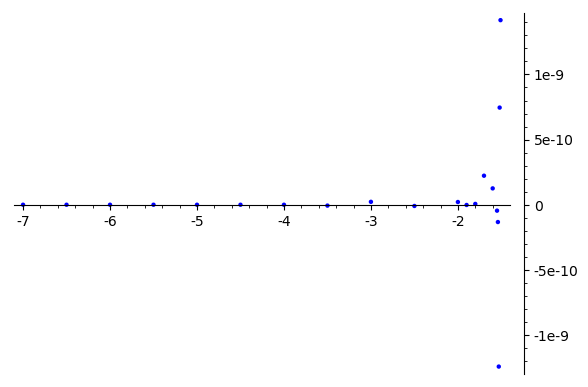

In [72]:
list_plot(plot_data_h_phi).show()

In [73]:
plot_data_h_phi = []
plot_data_h_phi_t = []
plot_data_h_phi_sv = []

Ra = Rj1
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_phi = calc_H_phi(Za, Ra)
    plot_data_h_phi += [(Za, h_phi[0])]
    plot_data_h_phi_t += [(Za, h_phi[1])]
    plot_data_h_phi_sv += [(Za, h_phi[2])]

Ra = 0.300000000000000 Za = -1.51000000000000 H_phi_t = 43065.27136398656
Ra = 0.300000000000000 Za = -1.51000000000000 H_phi_sv = -43065.27136398682
Ra = 0.300000000000000 Za = -1.51000000000000 H_phi = -2.6193447411060333e-10
Ra = 0.300000000000000 Za = -1.52000000000000 H_phi_t = 41062.22859285651
Ra = 0.300000000000000 Za = -1.52000000000000 H_phi_sv = -41062.22859285185
Ra = 0.300000000000000 Za = -1.52000000000000 H_phi = 4.663888830691576e-09
Ra = 0.300000000000000 Za = -1.53000000000000 H_phi_t = 39314.999702238354
Ra = 0.300000000000000 Za = -1.53000000000000 H_phi_sv = -39314.99970223839
Ra = 0.300000000000000 Za = -1.53000000000000 H_phi = -3.637978807091713e-11
Ra = 0.300000000000000 Za = -1.54000000000000 H_phi_t = 37734.66581022237
Ra = 0.300000000000000 Za = -1.54000000000000 H_phi_sv = -37734.665810222345
Ra = 0.300000000000000 Za = -1.54000000000000 H_phi = 2.1827872842550278e-11
Ra = 0.300000000000000 Za = -1.55000000000000 H_phi_t = 36279.10925668559
Ra = 0.300000000

Результирующий график магнитного поля $H_{\varphi}$ (эрстед) на расстоянии Ra = 0.3 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

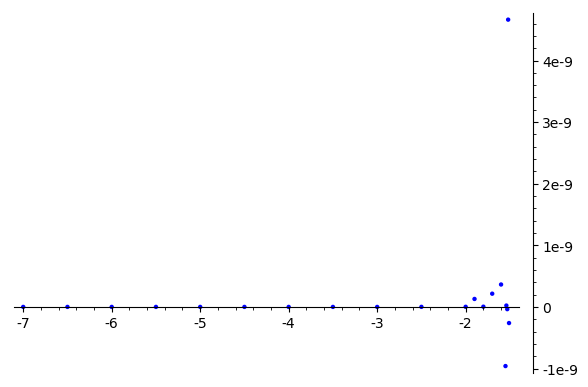

In [74]:
list_plot(plot_data_h_phi).show()

In [75]:
plot_data_h_phi = []
plot_data_h_phi_t = []
plot_data_h_phi_sv = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_phi = calc_H_phi(Za, Ra)
    plot_data_h_phi += [(Za, h_phi[0])]
    plot_data_h_phi_t += [(Za, h_phi[1])]
    plot_data_h_phi_sv += [(Za, h_phi[2])]

Ra = 0.900000000000000 Za = -1.51000000000000 H_phi_t = 29833.15605712638
Ra = 0.900000000000000 Za = -1.51000000000000 H_phi_sv = -29833.156057131804
Ra = 0.900000000000000 Za = -1.51000000000000 H_phi = -5.424226401373744e-09
Ra = 0.900000000000000 Za = -1.52000000000000 H_phi_t = 29405.089799622416
Ra = 0.900000000000000 Za = -1.52000000000000 H_phi_sv = -29405.089799623358
Ra = 0.900000000000000 Za = -1.52000000000000 H_phi = -9.422365110367537e-10
Ra = 0.900000000000000 Za = -1.53000000000000 H_phi_t = 28977.484210322094
Ra = 0.900000000000000 Za = -1.53000000000000 H_phi_sv = -28977.48421032274
Ra = 0.900000000000000 Za = -1.53000000000000 H_phi = -6.439222488552332e-10
Ra = 0.900000000000000 Za = -1.54000000000000 H_phi_t = 28550.589840493376
Ra = 0.900000000000000 Za = -1.54000000000000 H_phi_sv = -28550.589840493463
Ra = 0.900000000000000 Za = -1.54000000000000 H_phi = -8.731149137020111e-11
Ra = 0.900000000000000 Za = -1.55000000000000 H_phi_t = 28124.65482478087
Ra = 0.90000

Результирующий график магнитного поля $H_{\varphi}$ (эрстед) на расстоянии Ra = 0.9 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

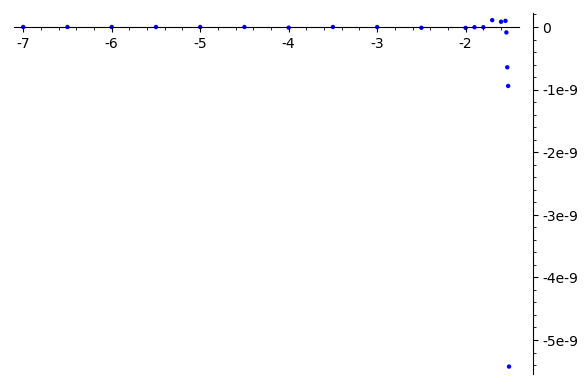

In [76]:
list_plot(plot_data_h_phi).show()

Запуск расчёта величины scalar магнитного поля для заданного набора значений зазора между цилиндрами

In [77]:
plot_data_h_scalar = []
plot_data_h_scalar_t = []
plot_data_h_scalar_sv = []

Ra = Rj2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_scalar = calc_H_scalar(Za, Ra)
    plot_data_h_scalar += [(Za, h_scalar[0])]
    plot_data_h_scalar_t += [(Za, h_scalar[1])]
    plot_data_h_scalar_sv += [(Za, h_scalar[2])]

Ra = 1.50000000000000 Za = -1.51000000000000 H_scalar_t = 23393.15305463854
Ra = 1.50000000000000 Za = -1.51000000000000 H_scalar_sv = -23393.153054655162
Ra = 1.50000000000000 Za = -1.51000000000000 H_scalar = -1.6621925169602036e-08
Ra = 1.50000000000000 Za = -1.52000000000000 H_scalar_t = 19343.328861400296
Ra = 1.50000000000000 Za = -1.52000000000000 H_scalar_sv = -19343.328861418566
Ra = 1.50000000000000 Za = -1.52000000000000 H_scalar = -1.8269929569214582e-08
Ra = 1.50000000000000 Za = -1.53000000000000 H_scalar_t = 16974.27329231946
Ra = 1.50000000000000 Za = -1.53000000000000 H_scalar_sv = -16974.273292319693
Ra = 1.50000000000000 Za = -1.53000000000000 H_scalar = -2.3283064365386963e-10
Ra = 1.50000000000000 Za = -1.54000000000000 H_scalar_t = 15293.835792785081
Ra = 1.50000000000000 Za = -1.54000000000000 H_scalar_sv = -15293.835792803959
Ra = 1.50000000000000 Za = -1.54000000000000 H_scalar = -1.88774720299989e-08
Ra = 1.50000000000000 Za = -1.55000000000000 H_scalar_t = 13

Результирующий график scalar магнитного поля $H_{||}$ на расстоянии Ra = 1.5 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

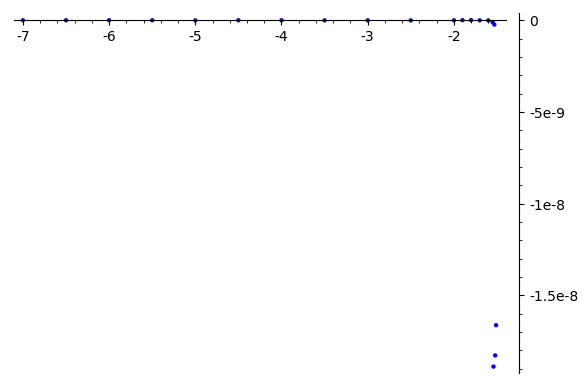

In [78]:
list_plot(plot_data_h_scalar).show()

In [79]:
plot_data_h_scalar = []
plot_data_h_scalar_t = []
plot_data_h_scalar_sv = []

Ra = Rj1
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_scalar = calc_H_scalar(Za, Ra)
    plot_data_h_scalar += [(Za, h_scalar[0])]
    plot_data_h_scalar_t += [(Za, h_scalar[1])]
    plot_data_h_scalar_sv += [(Za, h_scalar[2])]

Ra = 0.300000000000000 Za = -1.51000000000000 H_scalar_t = -140590.91087456726
Ra = 0.300000000000000 Za = -1.51000000000000 H_scalar_sv = 140590.91087455442
Ra = 0.300000000000000 Za = -1.51000000000000 H_scalar = -1.2834789231419563e-08
Ra = 0.300000000000000 Za = -1.52000000000000 H_scalar_t = -120339.51293531928
Ra = 0.300000000000000 Za = -1.52000000000000 H_scalar_sv = 120339.51293531954
Ra = 0.300000000000000 Za = -1.52000000000000 H_scalar = 2.6193447411060333e-10
Ra = 0.300000000000000 Za = -1.53000000000000 H_scalar_t = -108479.51623452848
Ra = 0.300000000000000 Za = -1.53000000000000 H_scalar_sv = 108479.51623452845
Ra = 0.300000000000000 Za = -1.53000000000000 H_scalar = -2.9103830456733704e-11
Ra = 0.300000000000000 Za = -1.54000000000000 H_scalar_t = -100051.84420093412
Ra = 0.300000000000000 Za = -1.54000000000000 H_scalar_sv = 100051.84420085265
Ra = 0.300000000000000 Za = -1.54000000000000 H_scalar = -8.1476173363626e-08
Ra = 0.300000000000000 Za = -1.55000000000000 H_

Результирующий график scalar магнитного поля $H_{||}$ на расстоянии Ra = 0.3 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

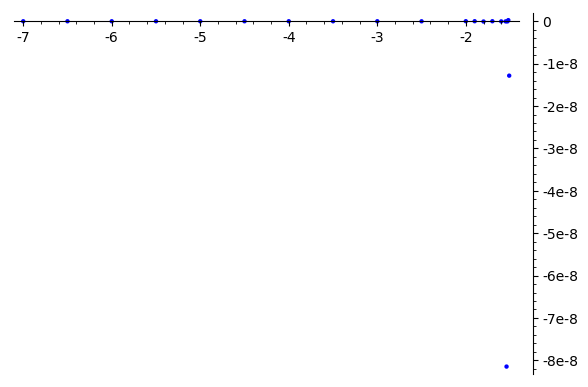

In [80]:
list_plot(plot_data_h_scalar).show()

In [81]:
plot_data_h_scalar = []
plot_data_h_scalar_t = []
plot_data_h_scalar_sv = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_scalar = calc_H_scalar(Za, Ra)
    plot_data_h_scalar += [(Za, h_scalar[0])]
    plot_data_h_scalar_t += [(Za, h_scalar[1])]
    plot_data_h_scalar_sv += [(Za, h_scalar[2])]

Ra = 0.900000000000000 Za = -1.51000000000000 H_scalar_t = -10290.142123859236
Ra = 0.900000000000000 Za = -1.51000000000000 H_scalar_sv = 10290.142123861473
Ra = 0.900000000000000 Za = -1.51000000000000 H_scalar = 2.2373569663614035e-09
Ra = 0.900000000000000 Za = -1.52000000000000 H_scalar_t = -10291.844068269143
Ra = 0.900000000000000 Za = -1.52000000000000 H_scalar_sv = 10291.844068269012
Ra = 0.900000000000000 Za = -1.52000000000000 H_scalar = -1.3096723705530167e-10
Ra = 0.900000000000000 Za = -1.53000000000000 H_scalar_t = -10290.762160731967
Ra = 0.900000000000000 Za = -1.53000000000000 H_scalar_sv = 10290.762160732127
Ra = 0.900000000000000 Za = -1.53000000000000 H_scalar = 1.6007106751203537e-10
Ra = 0.900000000000000 Za = -1.54000000000000 H_scalar_t = -10286.909121453182
Ra = 0.900000000000000 Za = -1.54000000000000 H_scalar_sv = 10286.90912145321
Ra = 0.900000000000000 Za = -1.54000000000000 H_scalar = 2.9103830456733704e-11
Ra = 0.900000000000000 Za = -1.55000000000000 H_

Результирующий график scalar магнитного поля $H_{||}$ на расстоянии Ra = 0.9 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

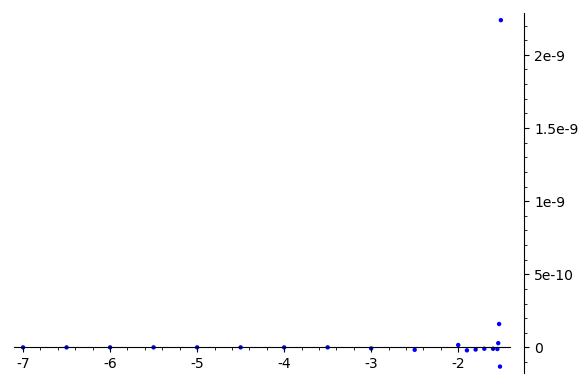

In [82]:
list_plot(plot_data_h_scalar).show()

Определяем функцию расчёта поперечной силы Лоренца (компонента $z$), действующей на торец другого цилиндра с координатой $Z_a$
удельная плотность силы Лоренца
$$f=\frac{1}{c}[j \times H]$$
поскольку в образовании результирующей силы участвуют только торцевые токи, берём поверхностный интеграл по площади поверхности торца
$$F=\frac{1}{c}\int\limits_{S_a}[j_t \times H]\,d{S_a}$$
в цилиндрической системе координат интеграл по площади торца
$$F=\frac{1}{c}\int\limits_{r_{a1}}^{r_{a2}}\int\limits_{0}^{2\pi}[j_t \times H]\,r_a\,d{\varphi_a}\,d{r_a}$$
упрощая
$$F=\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\,j_t\, H_{\varphi}\,r_a\,d{r_a}$$

где компонента $\varphi$ векторного магнитного поля $H_{\varphi} = \left(rot\,\vec{A}\right)_{\varphi}$

$H_{\varphi} = \frac{\partial}{\partial z_a}A_T - \frac{\partial}{\partial r_a}(A_S+A_V)$

Раскладывая выражение для магнитного поля на слагаемые можно вычислить три компоненты силы Лоренца 

$$F_T =\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\,j_t\, \left(\frac{\partial}{\partial z_a}A_T\right)\,r_a\,d{r_a}$$

$$F_S=\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\,j_t\, \left(- \frac{\partial}{\partial r_a}A_S\right)\,r_a\,d{r_a}$$

$$F_V=\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\,j_t\, \left(- \frac{\partial}{\partial r_a}A_V\right)\,r_a\,d{r_a}$$

Исходя из извесной формулы векторного анализа 

$$[\vec{j} \times rot\,\vec{A}] = \nabla\left(\vec{j}\cdot\vec{A}\right) - \left(\vec{j},\nabla\right)\vec{A}$$

легко понять что:

компонента силы Лоренца $F_T$ носит потенциальный характер

а компоненты силы Лоренца $F_S$ и $F_V$ носят конвективный характер

In [83]:
def calc_F_lorenz(Za, Ra1, Ra2):
    At_diff_za_subs_zj_za = lambda rj, ra : At_diff_za_subs_zj(rj, ra, Za)
    As_diff_ra_subs_rj_za = lambda ra, zj : As_diff_ra_subs_rj(ra, zj, Za)
    Av_diff_ra_subs_rj_za = lambda ra, zj : Av_diff_ra_subs_rj(ra, zj, Za)

    jt_c(r) = (jt(J, kappa, r)/c).substitute(J == J_d, kappa == kappa_d, c == c_d)

    At_diff_za_num_int_ra = lambda Rj : num_int(lambda ra : (2*pi*jt_c(ra)*ra*At_diff_za_subs_zj_za(Rj, ra)), Ra1, Ra2)
    At_diff_za_num_int_ra_int_rj = num_int(lambda rj : At_diff_za_num_int_ra(rj), Rj1, Rj2)

    As_diff_ra_num_int_ra = lambda Zj : num_int(lambda ra : (2*pi*jt_c(ra)*ra*(As_diff_ra_subs_rj_za(ra, Zj) ) ), Ra1, Ra2)
    As_diff_ra_num_int_ra_int_zj = num_int(lambda zj : As_diff_ra_num_int_ra(zj), Zj1, Zj2)

    Av_diff_ra_num_int_ra = lambda Zj : num_int(lambda ra : (2*pi*jt_c(ra)*ra*(Av_diff_ra_subs_rj_za(ra, Zj) ) ), Ra1, Ra2)
    Av_diff_ra_num_int_ra_int_zj = num_int(lambda zj : Av_diff_ra_num_int_ra(zj), Zj1, Zj2)

    F_z_t = At_diff_za_num_int_ra_int_rj
    F_z_s = - As_diff_ra_num_int_ra_int_zj
    F_z_v = - Av_diff_ra_num_int_ra_int_zj

    F_z = F_z_t + F_z_s + F_z_v

    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_t  =", F_z_t)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_s  =", F_z_s)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_v  =", F_z_v)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z    =", F_z)

    return (F_z, F_z_t, F_z_s, F_z_v)


Определяем функцию расчёта поперечной Лоренца (компонента $z$), действующей на левый цилиндр исходя из величины зазора $dz$

In [84]:
def calc_F_lorenz_cylinder(dz):
    # расчет силы Лоренца, действующей на ближайжий (правый) торец пробного цилиндра расположенного левее на расстоянии
    Za = Zj1 - dz
    F_lorenz_left_cylinder_right_t = calc_F_lorenz(Za, Ra1, Ra2)
    print ("Za = ", Za, "F_lorenz_left_cylinder_right_t = ", F_lorenz_left_cylinder_right_t)

    # расчет силы Лоренца, действующей на удалённый (левый) торец пробного цилиндра расположенного левее на расстоянии
    Za = Zj1 - DZ - dz
    F_lorenz_left_cylinder_left_t = calc_F_lorenz(Za, Ra1, Ra2)
    print ("Za = ", Za, "F_lorenz_left_cylinder_left_t =", F_lorenz_left_cylinder_left_t)

    # учитывая отрицательное направление торцевого тока в правом торце и положительное направление торцевого тока в левом торце
    # находим суммарную силу Лоренца действующую на левый цилиндр
    F_lorenz_cylinder = - F_lorenz_left_cylinder_right_t[0] + F_lorenz_left_cylinder_left_t[0]
    print ("dz = ", dz, "F_lorenz_cylinder = ", F_lorenz_cylinder)

    F_lorenz_cylinder_potential = - F_lorenz_left_cylinder_right_t[1] + F_lorenz_left_cylinder_left_t[1]
    print ("dz = ", dz, "F_lorenz_cylinder_potential = ", F_lorenz_cylinder_potential)

    F_lorenz_cylinder_convective = - F_lorenz_left_cylinder_right_t[2] + F_lorenz_left_cylinder_left_t[2] \
                                   - F_lorenz_left_cylinder_right_t[3] + F_lorenz_left_cylinder_left_t[3]
    print ("dz = ", dz, "F_lorenz_cylinder_convective = ", F_lorenz_cylinder_convective)

    return (F_lorenz_cylinder, F_lorenz_cylinder_potential, F_lorenz_cylinder_convective)



Определяем функцию расчёта силы Николаева (компонента $z$), действующей на поверхность другого цилиндра с координатой $R_a$
удельная плотность силы Николаева
$$f=\frac{1}{c}\left(j \, H_{||}\right)$$

поскольку в образовании результирующей силы участвуют surface токи, берём поверхностный интеграл по площади поверхности surface
$$F=\frac{1}{c}\int\limits_{S_a}\left(j \, H_{||}\right)\,d{S_a}$$
в цилиндрической системе координат интеграл по площади surface
$$F=\frac{1}{c}\int\limits_{z_{a1}}^{z_{a2}}\int\limits_{0}^{2\pi}\left(j \, H_{||}\right)\,R_a\,d{\varphi_a}\,d{z_a}$$
упрощая
$$F=\frac{2\pi\,R_a}{c}\int\limits_{z_{a1}}^{z_{a2}}\,j_s\, H_{||}\,d{z_a}$$

где скалярное магнитное поле $H_{||} = -\,div\,\vec{A}$

$H_{||}=-\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_T\right) - \frac{\partial}{\partial z_a}(A_S+A_V)$

Раскладывая выражение для скалярного магнитного поля на слагаемые можно вычислить три компоненты силы Николаева

$$F_T=\frac{2\pi\,R_a}{c}\int\limits_{z_{a1}}^{z_{a2}}\,j_s\, \left(-\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_T\right)\right)\,d{z_a}$$

$$F_S=\frac{2\pi\,R_a}{c}\int\limits_{z_{a1}}^{z_{a2}}\,j_s\, \left(-\frac{\partial}{\partial z_a}A_S\right)\,d{z_a}$$

$$F_V=\frac{2\pi\,R_a}{c}\int\limits_{z_{a1}}^{z_{a2}}\,j_s\, \left(-\frac{\partial}{\partial z_a}A_V\right)\,d{z_a}$$

Анализируя выражения для $F_S$ и $F_V$ можно заметить что они суть градиент потенциальной функции (50.8) взаимодействия токов согласно Тамм, Основы теории электричества, 1957, параграф 51 "Пондемоторное взаимодействие токов", с единственным отличием полученных здесь формул Николаева от формул Тамма - знак 

Таким образом компоненты силы Николаева $F_S$ и $F_V$ носят потенциальный характер. 

Анализируя выражения для $F_T$ можно заметить что по своему физическому смыслу она похожа на приложенную к рельсам продольную силу "отдачи рельсотрона" http://liquidcrystalosmos.narod.ru/railgun.htm существование которой отвергается в теории классической электродинамики 

Таким образом компонента силы Николаева $F_T$ носит конвективный характер и её существование под сомнением

In [85]:
def calc_F_nikolaev_int_on_surf(Ra, Za1, Za2):
    # integration on surface of the left cylinder
    At_ra_diff_ra_div_ra_subs_zj_ra = lambda rj, za : At_ra_diff_ra_div_ra_subs_zj(rj, Ra, za)
    As_diff_za_subs_rj_ra = lambda zj, za : As_diff_za_subs_rj(Ra, zj, za)
    Av_diff_za_subs_rj_ra = lambda zj, za : Av_diff_za_subs_rj(Ra, zj, za)
    
    js_c(r) = (js(J, kappa, r)/c).substitute(J == J_d, kappa == kappa_d, c == c_d)

    At_diff_ra_num_int_za = lambda Rj : num_int(lambda za : (2*pi*js_c(Ra)*Ra*At_ra_diff_ra_div_ra_subs_zj_ra(Rj, za)), Za1, Za2)
    At_diff_ra_num_int_za_int_rj = num_int(lambda rj : At_diff_ra_num_int_za(rj), Rj1, Rj2)

    As_diff_za_num_int_za = lambda Zj : num_int(lambda za : (2*pi*js_c(Ra)*Ra*(As_diff_za_subs_rj_ra(Zj, za) ) ), Za1, Za2)
    As_diff_za_num_int_za_int_zj = num_int(lambda zj : As_diff_za_num_int_za(zj), Zj1, Zj2)

    Av_diff_za_num_int_za = lambda Zj : num_int(lambda za : (2*pi*js_c(Ra)*Ra*(Av_diff_za_subs_rj_ra(Zj, za) ) ), Za1, Za2)
    Av_diff_za_num_int_za_int_zj = num_int(lambda zj : Av_diff_za_num_int_za(zj), Zj1, Zj2)

    F_z_t = - At_diff_ra_num_int_za_int_rj
    F_z_s = - As_diff_za_num_int_za_int_zj
    F_z_v = - Av_diff_za_num_int_za_int_zj

    F_z = F_z_t + F_z_s + F_z_v

    print ("Za1 =", Za1, "Za2 =", Za2, "Ra =", Ra, "F_z_t  =", F_z_t)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra =", Ra, "F_z_s  =", F_z_s)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra =", Ra, "F_z_v  =", F_z_v)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra =", Ra, "F_z    =", F_z)

    return (F_z, F_z_t, F_z_s, F_z_v)


Определяем функцию расчёта силы Николаева (компонента $z$), действующей на volume другого цилиндра
удельная плотность силы Николаева
$$f=\frac{1}{c}\left(j \, H_{||}\right)$$

в образовании результирующей силы участвуют volume токи, берём volume интеграл
$$F=\frac{1}{c}\int\limits_{V_a}\left(j_v \, H_{||}\right)\,d{V_a}$$
в цилиндрической системе координат интеграл по volume
$$F=\frac{1}{c}\int\limits_{r_{a1}}^{r_{a2}}\int\limits_{z_{a1}}^{z_{a2}}\int\limits_{0}^{2\pi}\left(j_v \, H_{||}\right)\,r_a\,d{\varphi_a}\,d{z_a}\,d{r_a}$$
упрощая
$$F=\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\int\limits_{z_{a1}}^{z_{a2}}\,j_v\, H_{||}\,r_a\,d{z_a}\,d{r_a}$$

где скалярное магнитное поле $H_{||} = -\,div\,\vec{A}$

$H_{||}=-\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_T\right) - \frac{\partial}{\partial z_a}(A_S+A_V)$

In [86]:
def calc_F_nikolaev_int_on_volume(Ra1, Ra2, Za1, Za2):
    # integration on volume of the left cylinder

    jv_c(r) = (jv(r)/c).substitute(J == J_d, kappa == kappa_d, c == c_d)

    At_diff_ra_num_int_za = lambda rj, ra : num_int(lambda za : (2*pi*jv_c(ra)*ra*At_ra_diff_ra_div_ra_subs_zj(rj, ra, za)), Za1, Za2)
    At_diff_ra_num_int_za_int_ra = lambda rj : num_int(lambda ra : At_diff_ra_num_int_za(rj, ra), Ra1, Ra2)
    At_diff_ra_num_int_za_int_ra_int_rj = num_int(lambda rj : At_diff_ra_num_int_za_int_ra(rj), Rj1, Rj2)

    As_diff_za_num_int_za = lambda ra, zj : num_int(lambda za : (2*pi*jv_c(ra)*ra*(As_diff_za_subs_rj(ra, zj, za) ) ), Za1, Za2)
    As_diff_za_num_int_za_int_ra = lambda zj : num_int(lambda ra : As_diff_za_num_int_za(ra, zj), Ra1, Ra2)
    As_diff_za_num_int_za_int_ra_int_zj = num_int(lambda zj : As_diff_za_num_int_za_int_ra(zj), Zj1, Zj2)

    Av_diff_za_num_int_za = lambda ra, zj : num_int(lambda za : (2*pi*jv_c(ra)*ra*(Av_diff_za_subs_rj(ra, zj, za) ) ), Za1, Za2)
    Av_diff_za_num_int_za_int_ra = lambda zj : num_int(lambda ra : Av_diff_za_num_int_za(ra, zj), Ra1, Ra2)
    Av_diff_za_num_int_za_int_ra_int_zj = num_int(lambda zj : Av_diff_za_num_int_za_int_ra(zj), Zj1, Zj2)

    F_z_t = - At_diff_ra_num_int_za_int_ra_int_rj
    F_z_s = - As_diff_za_num_int_za_int_ra_int_zj
    F_z_v = - Av_diff_za_num_int_za_int_ra_int_zj

    F_z = F_z_t + F_z_s + F_z_v

    print ("Za1 =", Za1, "Za2 =", Za2, "Ra1 =", Ra1, "Ra2 =", Ra2, "F_z_t  =", F_z_t)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra1 =", Ra1, "Ra2 =", Ra2, "F_z_s  =", F_z_s)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra1 =", Ra1, "Ra2 =", Ra2, "F_z_v  =", F_z_v)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra1 =", Ra1, "Ra2 =", Ra2, "F_z    =", F_z)

    return (F_z, F_z_t, F_z_s, F_z_v)


Определяем функцию расчёта силы Николаева (компонента $z$), действующей на левый цилиндр исходя из величины зазора $dz$

In [87]:
def calc_F_nikolaev_cylinder(dz):
    # расчет силы Николаева, действующей на inner surface пробного цилиндра расположенного левее на расстоянии
    Za1 = Zj1 - dz - DZ
    Za2 = Zj1 - dz
    Ra = Rj1
    F_nikolaev_left_cylinder_inner_surf = calc_F_nikolaev_int_on_surf(Ra, Za1, Za2)
    print ("Ra = ", Ra, "F_nikolaev_left_cylinder_inner_surf = ", F_nikolaev_left_cylinder_inner_surf)

    # расчет силы Николаева, действующей на outer surface пробного цилиндра расположенного левее на расстоянии
    Ra =  Rj2
    F_nikolaev_left_cylinder_outer_surf = calc_F_nikolaev_int_on_surf(Ra, Za1, Za2)
    print ("Ra = ", Ra, "F_nikolaev_left_cylinder_outer_surf =", F_nikolaev_left_cylinder_outer_surf)

    # расчет силы Николаева, действующей на volume пробного цилиндра расположенного левее на расстоянии
    Ra1 = Rj1
    Ra2 = Rj2
    F_nikolaev_left_cylinder_volume = calc_F_nikolaev_int_on_volume(Ra1, Ra2, Za1, Za2)
    print ("Ra = ", Ra, "F_nikolaev_left_cylinder_volume =", F_nikolaev_left_cylinder_volume)
    
    # учитывая что отрицательное направление объемного тока уже учтено в jv(r) = - c * I0 / r
    # учитывая отрицательное направление поверхностного тока на внутренней поверхности (inner surface)
    # и положительное направление поверхностного тока на внешней поверхности (outer surface)
    # находим суммарную силу Николаева действующую на левый цилиндр
    F_nikolaev_cylinder = F_nikolaev_left_cylinder_volume[0] - F_nikolaev_left_cylinder_inner_surf[0] + F_nikolaev_left_cylinder_outer_surf[0]
    print ("dz = ", dz, "F_nikolaev_cylinder = ", F_nikolaev_cylinder)

    F_nikolaev_cylinder_convective = F_nikolaev_left_cylinder_volume[1] - F_nikolaev_left_cylinder_inner_surf[1] + F_nikolaev_left_cylinder_outer_surf[1]
    print ("dz = ", dz, "F_nikolaev_cylinder_convective = ", F_nikolaev_cylinder_convective)
    
    F_nikolaev_cylinder_potential = F_nikolaev_left_cylinder_volume[2] - F_nikolaev_left_cylinder_inner_surf[2] + F_nikolaev_left_cylinder_outer_surf[2] \
                                  + F_nikolaev_left_cylinder_volume[3] - F_nikolaev_left_cylinder_inner_surf[3] + F_nikolaev_left_cylinder_outer_surf[3]
    print ("dz = ", dz, "F_nikolaev_cylinder_potential = ", F_nikolaev_cylinder_potential)


    return (F_nikolaev_cylinder, F_nikolaev_cylinder_convective, F_nikolaev_cylinder_potential)



Запуск расчёта силы Лоренца и величины векторного магнитного поля для заданного набора значений зазора между цилиндрами

Результирующий график силы Лоренца приложенной к левому цилиндру в зависимости от координаты правого торца левого цилиндра в сантиметрах. Сила в динах (ибо все расчеты здесь произведены в системе гаусса).

Результирующий график силы Николаева приложенной к левому цилиндру в зависимости от координаты правого торца левого цилиндра

Результирующий график силы Николаева + силы Лоренца приложенной к левому цилиндру в зависимости от координаты правого торца левого цилиндра

In [88]:
#list_plot(plot_data_f_sum).show()

Результаты расчёта силы притяжения между тороидально намагниченными цилиндрами в зависимости от зазора позволяют сделать вывод о том, что поперечная сила Ампера-Лоренца при величине зазора меньше определённого предела работает на притяжение цилиндров, которое собственно и зафиксировано в опыте. 

численные значения силы Ампера-Лоренца:

$dz\,=\,0.1\,мм\,F_{lorenz}\,=\,131798157\,дин\,=\,13.18\,Ньютон$ 

$dz\,=\,0.2\,мм\,F_{lorenz}\,=\,121534907\,дин\,=\,12.15\,Ньютон$

$dz\,=\,1.0\,мм\,F_{lorenz}\,=\,\,\,50568342\,дин\,=\,\,5.05\,Ньютон$

$dz\,=\,2.0\,мм\,F_{lorenz}\,=-15795654\,дин\,=-1.58\,Ньютон$


При сравнении полученных значений с экспериментом весьма существенно понимать, что численное значение вычисленной силы квадратично зависит от величины магнитной восприимчивости.

Более того последняя зависит также от величины напряженности магнитного поля прямого провода с током (Кривая Столетова). Данное обстоятельство, вообще говоря, приведёт к зависимости намагниченности от радиуса иного вида, чем в рассматриваемой здесь модели (обратная пропорциональность намагниченности от радиуса).

При величине зазора больше определённого предела (2-3 мм) поперечная сила Ампера-Лоренца работает на отталкивание цилиндров. Этот предел расстояния на котором происходит изменение знака силы Лоренца зависит от вида зависимости намагниченности от радиуса.

Изменение знака силы взаимодействия цилиндров в опыте Дейны зафиксировано не было, ввиду того, что при планировании эксперимента вопрос о зависимости направления силы взаимодействия от зазора между цилиндрами не ставился. Кроме того в предоставленном С.А.Дейной видео отсутствуют доказательства того, что знак направления силы взаимодействия цилиндров не зависит от расстояния, и потому не следует считать доказанным существование силы Николаева на основании данного видео материала.

На взгляд автора для дальнейших исследований необходима следующая постановка эксперимента: установить зазор между цилиндрами более 3 мм. И показать направление силы их взаимодействия: притягивание или отталкивание.

Таким образом в данной работе показано, что для доказательства существования продольной силы Николаева с помощью опыта Дейны (опыт Николаева 31) совершенно недостаточно установления факта притяжения цилиндров при зазоре между их торцами менее 3 мм. Для выяснения этого вопроса необходимы дальнейшие экспериментальные и теоретические исследования.

В частности необходимо исследование вида зависимости намагниченности от радиуса.

# К вопросу о теореме циркуляции магнитного поля в плоскости вне материала тороидально намагниченного цилиндра

Результирующий график векторного магнитного поля $H$ (компонента $\varphi$) на расстоянии Ra = 0.9 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

Может показаться, что полученные в данной работе результаты о налиции угловой компоненты векторного магнитного поля за пределами материала тороидально намагниченного цилиндра противоречат теореме о циркуляции магнитного поля.

$\oint {\vec  B}\cdot {\vec  {dl}}={\frac  {4\pi }{c}}\int {\vec  j}\cdot {\vec  {ds}}$

Действительно, циркуляция магнитного поля взятая по окружности отстоящей на некотором расстоянии от торца тороидально намагниченного цилиндра отлична от нуля, в то время как молекулярные токи намагниченности не пересекают плоскость, натянутую на эту окружность.

Это кажущееся противоречие разрешается тем, что данную плоскость пересекают токи смещения продуцированные молекулярными токами намагниченности цилиндра.

Исходя из определения ротора в цилиндрических координатах и того факта что в данной конфигурации отлична от нуля только $H_{\varphi}$ компонента магнитного поля для ротора $H$ будут отличными от нуля следующие две компоненты


$rot\,H_r = -\frac{\partial}{\partial z_a}H_{\varphi}$

$rot\,H_z = \frac{1}{r_a}\frac{\partial}{\partial r_a}(r_a\,H_{\varphi})$

где

$H_{\varphi}=\frac{\partial}{\partial z_a}A_T - \frac{\partial}{\partial r_a}(A_S+A_V)$

Итак,

$rot\,H_r = -\frac{\partial}{\partial z_a}\frac{\partial}{\partial z_a}A_T+\frac{\partial}{\partial z_a}\frac{\partial}{\partial r_a}(A_S+A_V)$

$rot\,H_z = \frac{1}{r_a}\frac{\partial}{\partial r_a}(r_a\,\frac{\partial}{\partial z_a}A_T)-\frac{1}{r_a}\frac{\partial}{\partial r_a}(r_a\,\frac{\partial}{\partial r_a}(A_S+A_V))$

In [89]:
#At2_diff_za_mult_ra_diff_ra_div_ra = lambda J, c, kappa, rj, ra, zj1, zj2, za : (1/ra)*(ra*At2_diff_za (J, c, kappa, rj, ra, zj1, zj2, za)).diff(ra)
#print(At2_diff_za_mult_ra_diff_ra_div_ra (J, c, kappa, rj, ra, zj1, zj2, za))

In [90]:
#As2_diff_ra_mult_ra_diff_ra_div_ra = lambda J, c, kappa, rj1, rj2, ra, zj, za : (1/ra)*(ra*As2_diff_ra (J, c, kappa, rj1, rj2, ra, zj, za)).diff(ra)
#print (As2_diff_ra_mult_ra_diff_ra_div_ra (J, c, kappa, rj1, rj2, ra, zj, za))

In [91]:
#exec(preparse("At_diff_za_mult_ra_diff_ra_div_ra_subs_zj = lambda rj, ra, za : " + str(At2_diff_za_mult_ra_diff_ra_div_ra (J_d, c_d, kappa_d, rj, ra, Zj1, Zj2, za))))
## print (At_diff_za_mult_ra_diff_ra_div_ra_subs_zj (rj, ra, za))

In [92]:
#exec(preparse("As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj = lambda ra, zj, za : " + str(As2_diff_ra_mult_ra_diff_ra_div_ra (J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za))))
# print (As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj (ra, zj, za))

In [93]:
#exec(preparse("Av_diff_ra_mult_ra_diff_ra_div_ra = lambda J, c, kappa, rj, ra, zj, za : " + str((1/ra)*(ra*Av_diff_ra(J, c, kappa, rj, ra, zj, za)).diff(ra))))
#print (Av_diff_ra_mult_ra_diff_ra_div_ra (J, c, kappa, rj, ra, zj, za))

In [94]:
#AV_diff_ra_mult_ra_diff_ra_div_ra = lambda J, c, kappa, rj1, rj2, ra, zj, za : num_int(lambda rj : Av_diff_ra_mult_ra_diff_ra_div_ra(J, c, kappa, rj, ra, zj, za), rj1, rj2)

In [95]:
#Av_diff_ra_mult_ra_diff_ra_div_ra_subs_rj = lambda ra, zj, za : AV_diff_ra_mult_ra_diff_ra_div_ra (J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za)
# print (Av_diff_ra_mult_ra_diff_ra_div_ra_subs_rj(ra, zj, za))

In [96]:
def calc_rot_H_z(Za, Ra):
    At_diff_za_mult_ra_diff_ra_div_ra_subs_zj_subs_za_ra = lambda rj : At_diff_za_mult_ra_diff_ra_div_ra_subs_zj(rj, Ra, Za)
    As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj_subs_za_ra = lambda zj : As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj(Ra, zj, Za)

    #At_diff_za_mult_ra_diff_ra_div_ra_num_int = At_diff_za_mult_ra_diff_ra_div_ra_subs_zj_subs_za_ra(rj).nintegral(rj, Rj1, Rj2)
    #As_diff_ra_mult_ra_diff_ra_div_ra_num_int = As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj_subs_za_ra(zj).nintegral(zj, Zj1, Zj2)
    At_diff_za_mult_ra_diff_ra_div_ra_num_int = num_int( lambda rj : At_diff_za_mult_ra_diff_ra_div_ra_subs_zj_subs_za_ra(rj), Rj1, Rj2)
    As_diff_ra_mult_ra_diff_ra_div_ra_num_int = num_int( lambda zj : As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj_subs_za_ra(zj), Zj1, Zj2)
    Av_diff_ra_mult_ra_diff_ra_div_ra_num_int = num_int( lambda zj : Av_diff_ra_mult_ra_diff_ra_div_ra_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_ra_mult_ra_diff_ra_div_ra_num_int = As_diff_ra_mult_ra_diff_ra_div_ra_num_int + Av_diff_ra_mult_ra_diff_ra_div_ra_num_int

    rot_H_z = At_diff_za_mult_ra_diff_ra_div_ra_num_int - As_v_diff_ra_mult_ra_diff_ra_div_ra_num_int

    print ("Ra =", Ra, "Za =", Za, "rot_H_z =", rot_H_z)

    return rot_H_z

Теорема о циркуляции магнитного поля записывается следующим образом

$\oint {\vec  B}\cdot {\vec  {dl}}={\frac  {4\pi }{c}}\int {\vec  j}\cdot {\vec  {ds}}$

Вне материала цилиндра ток проводимости (равно как и молекулярный ток намагниченности) равен нулю.

Поэтому единственно возможный вариант в этом случае принять, что циркуляция магнитного поля в плоскости не пересекающей материал тороидально намагниченного цилиндра, обусловлена токами смещения

$\vec{j_{см}} = \frac{c}{4\pi}\,  rot\,\vec{H}$

Подставляя данное выражение для тока смещения в теорему о циркуляции приходим к тождеству

$\oint {\vec  B}\cdot {\vec  {dl}}=  \int { rot\,\vec{H}}\cdot {\vec  {ds}}$

проверкой которого и займёмся

$2\,\pi\,R_a\ H_{\varphi} =  \int\limits_{0}^{2\pi}\int\limits_{0}^{R_a} r\,rot\,H_z\,{dr}\,{d\varphi}$

$2\,\pi\,R_a\ H_{\varphi} = 2\,\pi\, \int\limits_{0}^{R_a} r\,rot\,H_z\,{dr}$


Итак мы видим, что результат проверки теоремы циркуляции в плоскости, отстоящей на некоторое расстояние от левого торца цилиндра вполне удовлетворителен, что косвенно подтверждает гипотезу о существовании токов смещения вне материала тороидально намагниченного цилиндра

Ниже представлены графики $z$-компоненты плотности тока смещения (исходя из ротора напряженности магнитного поля) вне материала тороидально намагниченного цилиндра в зависимости от $z$ координаты для разных радиальных координат

Ниже представлена процедура вычисления $r$-компоненты плотности тока смещения исходя из ротора напряженности магнитного поля

График $r$-компоненты плотности тока смещения (исходя из ротора напряженности магнитного поля) вне материала тороидально намагниченного цилиндра в зависимости от $z$ координаты для радиальной координаты центра тела тороида

Теперь представляет интерес двумерная визуализация скалярного и векторного магнитного полей а также тока смещения (ротора $H$)

In [97]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

za_linspace = np.linspace(-3, 0, 20)
ra_linspace = np.linspace(0.1, 3, 9)

za_list = za_linspace.tolist()
ra_list = ra_linspace.tolist()

za_grid,ra_grid = np.meshgrid(za_linspace, ra_linspace)

u = za_grid * np.nan
v = ra_grid * np.nan
s = ra_grid * np.nan
s_t = ra_grid * np.nan
s_s = ra_grid * np.nan
h = ra_grid * np.nan
h_t = ra_grid * np.nan
h_s = ra_grid * np.nan

for iz in np.arange(0, len(za_linspace), 1):
    for ir in np.arange(0, len(ra_linspace), 1):
        Za = za_list[iz]
        Ra = ra_list[ir]
        #u[ir][iz] = calc_rot_H_z(Za, Ra)
        #v[ir][iz] = calc_rot_H_r(Za, Ra)
        
        h_scalar = calc_H_scalar(Za, Ra)
        s  [ir][iz] = h_scalar[0]
        s_t[ir][iz] = h_scalar[1]
        s_s[ir][iz] = h_scalar[2]
        
        h_phi = calc_H_phi(Za, Ra)
        h  [ir][iz] = h_phi[0]
        h_t[ir][iz] = h_phi[1]
        h_s[ir][iz] = h_phi[2]


Ra = 0.1 Za = -3.0 H_scalar_t = -4684.769465255218
Ra = 0.1 Za = -3.0 H_scalar_sv = 4684.769465255219
Ra = 0.1 Za = -3.0 H_scalar = 9.094947017729282e-13
Ra = 0.1 Za = -3.0 H_phi_t = 349.1571703234048
Ra = 0.1 Za = -3.0 H_phi_sv = -349.1571703234049
Ra = 0.1 Za = -3.0 H_phi = -1.1368683772161603e-13
Ra = 0.4625 Za = -3.0 H_scalar_t = -4075.169080273908
Ra = 0.4625 Za = -3.0 H_scalar_sv = 4075.169080273909
Ra = 0.4625 Za = -3.0 H_scalar = 9.094947017729282e-13
Ra = 0.4625 Za = -3.0 H_phi_t = 1460.275990841293
Ra = 0.4625 Za = -3.0 H_phi_sv = -1460.2759908412932
Ra = 0.4625 Za = -3.0 H_phi = -2.2737367544323206e-13
Ra = 0.825 Za = -3.0 H_scalar_t = -2955.170854809854
Ra = 0.825 Za = -3.0 H_scalar_sv = 2955.170854809856
Ra = 0.825 Za = -3.0 H_scalar = 1.8189894035458565e-12
Ra = 0.825 Za = -3.0 H_phi_t = 2083.000048413843
Ra = 0.825 Za = -3.0 H_phi_sv = -2083.0000484138436
Ra = 0.825 Za = -3.0 H_phi = -4.547473508864641e-13
Ra = 1.1875 Za = -3.0 H_scalar_t = -1760.8640438890293
Ra = 1.187

Ra = 1.55 Za = -2.6842105263157894 H_phi_t = 2637.969794676703
Ra = 1.55 Za = -2.6842105263157894 H_phi_sv = -2637.9697946767096
Ra = 1.55 Za = -2.6842105263157894 H_phi = -6.821210263296962e-12
Ra = 1.9125 Za = -2.6842105263157894 H_scalar_t = 56.31829006571619
Ra = 1.9125 Za = -2.6842105263157894 H_scalar_sv = -56.31829006571695
Ra = 1.9125 Za = -2.6842105263157894 H_scalar = -7.602807272633072e-13
Ra = 1.9125 Za = -2.6842105263157894 H_phi_t = 1769.890007142775
Ra = 1.9125 Za = -2.6842105263157894 H_phi_sv = -1769.890007142766
Ra = 1.9125 Za = -2.6842105263157894 H_phi = 8.86757334228605e-12
Ra = 2.275 Za = -2.6842105263157894 H_scalar_t = 340.7999334934701
Ra = 2.275 Za = -2.6842105263157894 H_scalar_sv = -340.79993349347876
Ra = 2.275 Za = -2.6842105263157894 H_scalar = -8.640199666842818e-12
Ra = 2.275 Za = -2.6842105263157894 H_phi_t = 1092.7777383125676
Ra = 2.275 Za = -2.6842105263157894 H_phi_sv = -1092.777738312566
Ra = 2.275 Za = -2.6842105263157894 H_phi = 1.59161572810262

Ra = 2.6375 Za = -2.3684210526315788 H_scalar_t = 642.1833001418679
Ra = 2.6375 Za = -2.3684210526315788 H_scalar_sv = -642.1833001418676
Ra = 2.6375 Za = -2.3684210526315788 H_scalar = 3.410605131648481e-13
Ra = 2.6375 Za = -2.3684210526315788 H_phi_t = 589.9224686269341
Ra = 2.6375 Za = -2.3684210526315788 H_phi_sv = -589.9224686254543
Ra = 2.6375 Za = -2.3684210526315788 H_phi = 1.4798615666222759e-09
Ra = 3.0 Za = -2.3684210526315788 H_scalar_t = 504.4347483525029
Ra = 3.0 Za = -2.3684210526315788 H_scalar_sv = -504.43474835250186
Ra = 3.0 Za = -2.3684210526315788 H_scalar = 1.0231815394945443e-12
Ra = 3.0 Za = -2.3684210526315788 H_phi_t = 299.60029600221685
Ra = 3.0 Za = -2.3684210526315788 H_phi_sv = -299.6002960022129
Ra = 3.0 Za = -2.3684210526315788 H_phi = 3.979039320256561e-12
Ra = 0.1 Za = -2.2105263157894735 H_scalar_t = -18347.634584894568
Ra = 0.1 Za = -2.2105263157894735 H_scalar_sv = 18347.634584894582
Ra = 0.1 Za = -2.2105263157894735 H_scalar = 1.4551915228366852e-1

Ra = 0.1 Za = -1.8947368421052633 H_phi_t = 4269.925343942815
Ra = 0.1 Za = -1.8947368421052633 H_phi_sv = -4269.925343942388
Ra = 0.1 Za = -1.8947368421052633 H_phi = 4.2655301513150334e-10
Ra = 0.4625 Za = -1.8947368421052633 H_scalar_t = -25406.990989555925
Ra = 0.4625 Za = -1.8947368421052633 H_scalar_sv = 25406.99098955588
Ra = 0.4625 Za = -1.8947368421052633 H_scalar = -4.3655745685100555e-11
Ra = 0.4625 Za = -1.8947368421052633 H_phi_t = 16001.575112851886
Ra = 0.4625 Za = -1.8947368421052633 H_phi_sv = -16001.575112851853
Ra = 0.4625 Za = -1.8947368421052633 H_phi = 3.2741809263825417e-11
Ra = 0.825 Za = -1.8947368421052633 H_scalar_t = -11026.621455096349
Ra = 0.825 Za = -1.8947368421052633 H_scalar_sv = 11026.62145509633
Ra = 0.825 Za = -1.8947368421052633 H_scalar = -1.8189894035458565e-11
Ra = 0.825 Za = -1.8947368421052633 H_phi_t = 16122.19830913224
Ra = 0.825 Za = -1.8947368421052633 H_phi_sv = -16122.198309132205
Ra = 0.825 Za = -1.8947368421052633 H_phi = 3.45607986673

Ra = 1.1875 Za = -1.5789473684210527 H_scalar_t = 26.450899532828544
Ra = 1.1875 Za = -1.5789473684210527 H_scalar_sv = -26.450899532843096
Ra = 1.1875 Za = -1.5789473684210527 H_scalar = -1.4551915228366852e-11
Ra = 1.1875 Za = -1.5789473684210527 H_phi_t = 20115.639793370035
Ra = 1.1875 Za = -1.5789473684210527 H_phi_sv = -20115.63979336999
Ra = 1.1875 Za = -1.5789473684210527 H_phi = 4.729372449219227e-11
Ra = 1.55 Za = -1.5789473684210527 H_scalar_t = 10566.040953996411
Ra = 1.55 Za = -1.5789473684210527 H_scalar_sv = -10566.04095401418
Ra = 1.55 Za = -1.5789473684210527 H_scalar = -1.7769707483239472e-08
Ra = 1.55 Za = -1.5789473684210527 H_phi_t = 5101.311532977656
Ra = 1.55 Za = -1.5789473684210527 H_phi_sv = -5101.3115329777
Ra = 1.55 Za = -1.5789473684210527 H_phi = -4.4565240386873484e-11
Ra = 1.9125 Za = -1.5789473684210527 H_scalar_t = 3815.1439409045524
Ra = 1.9125 Za = -1.5789473684210527 H_scalar_sv = -3815.143940904561
Ra = 1.9125 Za = -1.5789473684210527 H_scalar = -8.

Ra = 1.9125 Za = -1.2631578947368423 H_phi_t = -2198.8070375439634
Ra = 1.9125 Za = -1.2631578947368423 H_phi_sv = 2198.8070375439875
Ra = 1.9125 Za = -1.2631578947368423 H_phi = 2.4101609596982598e-11
Ra = 2.275 Za = -1.2631578947368423 H_scalar_t = 1857.786107671483
Ra = 2.275 Za = -1.2631578947368423 H_scalar_sv = -1857.786107671464
Ra = 2.275 Za = -1.2631578947368423 H_scalar = 1.9099388737231493e-11
Ra = 2.275 Za = -1.2631578947368423 H_phi_t = -1087.757782396529
Ra = 2.275 Za = -1.2631578947368423 H_phi_sv = 1087.7577823965175
Ra = 2.275 Za = -1.2631578947368423 H_phi = -1.1368683772161603e-11
Ra = 2.6375 Za = -1.2631578947368423 H_scalar_t = 1129.8318926197521
Ra = 2.6375 Za = -1.2631578947368423 H_scalar_sv = -1129.8318926197517
Ra = 2.6375 Za = -1.2631578947368423 H_scalar = 4.547473508864641e-13
Ra = 2.6375 Za = -1.2631578947368423 H_phi_t = -691.4846193498912
Ra = 2.6375 Za = -1.2631578947368423 H_phi_sv = 691.4846193497904
Ra = 2.6375 Za = -1.2631578947368423 H_phi = -1.008

Ra = 3.0 Za = -0.9473684210526319 H_scalar_t = 603.8788438973968
Ra = 3.0 Za = -0.9473684210526319 H_scalar_sv = -603.8788438973991
Ra = 3.0 Za = -0.9473684210526319 H_scalar = -2.2737367544323206e-12
Ra = 3.0 Za = -0.9473684210526319 H_phi_t = -733.4177058469811
Ra = 3.0 Za = -0.9473684210526319 H_phi_sv = 733.4177058469799
Ra = 3.0 Za = -0.9473684210526319 H_phi = -1.2505552149377763e-12
Ra = 0.1 Za = -0.7894736842105265 H_scalar_t = -17006.51816112154
Ra = 0.1 Za = -0.7894736842105265 H_scalar_sv = 17006.518161121567
Ra = 0.1 Za = -0.7894736842105265 H_scalar = 2.546585164964199e-11
Ra = 0.1 Za = -0.7894736842105265 H_phi_t = -2001.827439857138
Ra = 0.1 Za = -0.7894736842105265 H_phi_sv = 2001.8274398571193
Ra = 0.1 Za = -0.7894736842105265 H_phi = -1.864464138634503e-11
Ra = 0.4625 Za = -0.7894736842105265 H_scalar_t = -12888.830282660312
Ra = 0.4625 Za = -0.7894736842105265 H_scalar_sv = 12888.830282660318
Ra = 0.4625 Za = -0.7894736842105265 H_scalar = 5.4569682106375694e-12
Ra =

Ra = 0.4625 Za = -0.47368421052631593 H_phi_t = -4369.350337543872
Ra = 0.4625 Za = -0.47368421052631593 H_phi_sv = -114631.8944358512
Ra = 0.4625 Za = -0.47368421052631593 H_phi = -119001.24477339507
Ra = 0.825 Za = -0.47368421052631593 H_scalar_t = -3640.672152174229
Ra = 0.825 Za = -0.47368421052631593 H_scalar_sv = 3640.6721521742184
Ra = 0.825 Za = -0.47368421052631593 H_scalar = -1.0459189070388675e-11
Ra = 0.825 Za = -0.47368421052631593 H_phi_t = -5888.679617326502
Ra = 0.825 Za = -0.47368421052631593 H_phi_sv = -60824.13942230844
Ra = 0.825 Za = -0.47368421052631593 H_phi = -66712.81903963494
Ra = 1.1875 Za = -0.47368421052631593 H_scalar_t = -1324.9876080090578
Ra = 1.1875 Za = -0.47368421052631593 H_scalar_sv = 1324.9876080090567
Ra = 1.1875 Za = -0.47368421052631593 H_scalar = -1.1368683772161603e-12
Ra = 1.1875 Za = -0.47368421052631593 H_phi_t = -5664.531686387485
Ra = 1.1875 Za = -0.47368421052631593 H_phi_sv = -40683.32154115176
Ra = 1.1875 Za = -0.47368421052631593 H_p

Ra = 1.55 Za = -0.1578947368421053 H_scalar_t = -29.73313691636225
Ra = 1.55 Za = -0.1578947368421053 H_scalar_sv = 29.733136907996823
Ra = 1.55 Za = -0.1578947368421053 H_scalar = -8.36542568549703e-09
Ra = 1.55 Za = -0.1578947368421053 H_phi_t = -3950.5073207569662
Ra = 1.55 Za = -0.1578947368421053 H_phi_sv = 3950.5073207569467
Ra = 1.55 Za = -0.1578947368421053 H_phi = -1.9554136088117957e-11
Ra = 1.9125 Za = -0.1578947368421053 H_scalar_t = 153.01393573201585
Ra = 1.9125 Za = -0.1578947368421053 H_scalar_sv = -153.01393573202176
Ra = 1.9125 Za = -0.1578947368421053 H_scalar = -5.9117155615240335e-12
Ra = 1.9125 Za = -0.1578947368421053 H_phi_t = -3007.564187943166
Ra = 1.9125 Za = -0.1578947368421053 H_phi_sv = 3007.5641879439527
Ra = 1.9125 Za = -0.1578947368421053 H_phi = 7.867129170335829e-10
Ra = 2.275 Za = -0.1578947368421053 H_scalar_t = 180.04644647998114
Ra = 2.275 Za = -0.1578947368421053 H_scalar_sv = -180.04644647998543
Ra = 2.275 Za = -0.1578947368421053 H_scalar = -4.

In [98]:
line_thick = 0.005
arr_l = 0.15
arr_h = 0.025
color = "red"

def matplotlib_draw_cylinder(plt, z0 = 0):
    plt.plot(z0 + Zj1,      Rj2                 , z0 + Zj2,Rj2, marker='.', color = color)
    plt.plot(z0 + Zj2,      Rj2                 , z0 + Zj2,Rj1, marker='.', color = color, linestyle="dashed")
    plt.plot(z0 + Zj2,      Rj1                 , z0 + Zj1,Rj1, marker='.', color = color)
    plt.plot(z0 + Zj1,      Rj1                 , z0 + Zj1,Rj2, marker='.', color = color, linestyle="dashed")

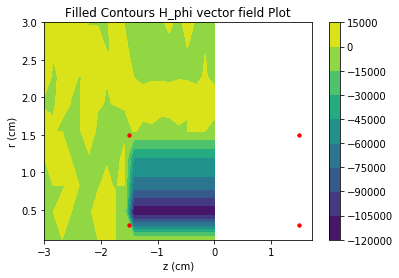

In [99]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, h)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours H_phi vector field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

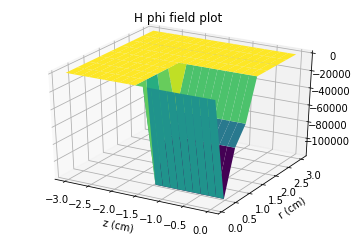

In [100]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(za_grid,ra_grid, h, cmap='viridis', edgecolor='none')
ax.set_title('H phi field plot')
plt.show()

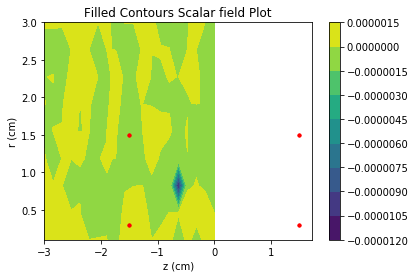

In [101]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, s)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Scalar field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/quiver.py:648: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/quiver.py:719: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/quiver.py:733: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


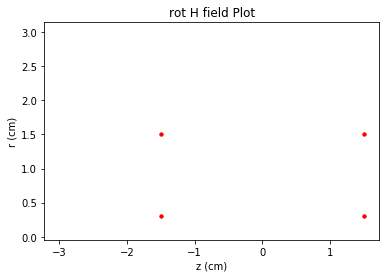

In [102]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
ax.quiver(za_grid,ra_grid,u,v)
ax.set_title('rot H field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

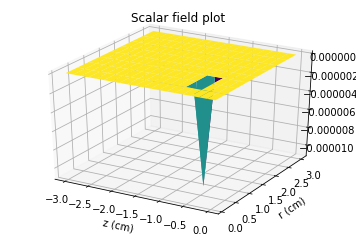

In [103]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(za_grid,ra_grid, s, cmap='viridis', edgecolor='none')
ax.set_title('Scalar field plot')
plt.show()

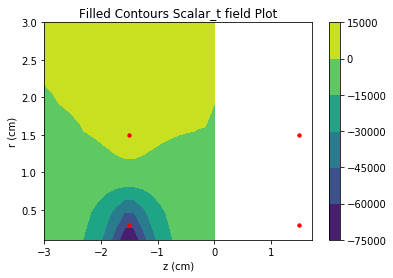

In [104]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, s_t)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Scalar_t field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

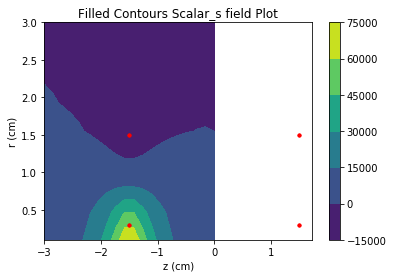

In [105]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, s_s)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Scalar_s field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

In [106]:
u_ex = u
v_ex = v
s_ex = s
h_ex = h

for iz in np.arange(0, len(za_linspace), 1):
    for ir in np.arange(0, len(ra_linspace), 1):
        Za = za_list[iz]
        Ra = ra_list[ir]
        if Za >= Zj1 and Za <= Zj2 and Ra >= Rj1 and Ra <= Rj2:
            u_ex[ir][iz] = np.nan
            v_ex[ir][iz] = np.nan
            s_ex[ir][iz] = np.nan
            h_ex[ir][iz] = np.nan

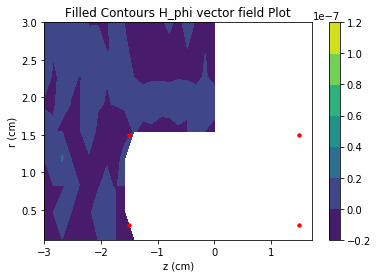

In [107]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, h_ex)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours H_phi vector field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/colors.py:507: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


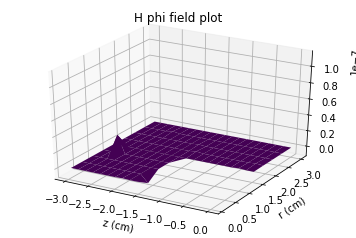

In [108]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(za_grid,ra_grid, h_ex, cmap='viridis', edgecolor='none')
ax.set_title('H phi field plot')
plt.show()

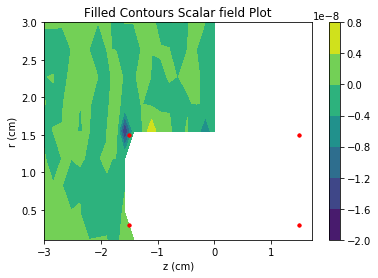

In [109]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, s_ex)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Scalar field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/quiver.py:648: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/quiver.py:719: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/quiver.py:733: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


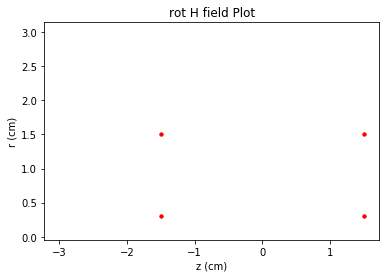

In [110]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
ax.quiver(za_grid,ra_grid,u_ex,v_ex)
ax.set_title('rot H field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/colors.py:507: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


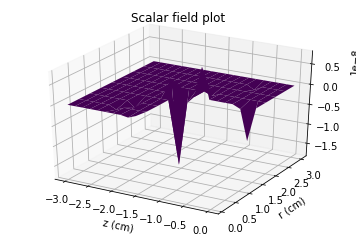

In [111]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(za_grid,ra_grid, s_ex, cmap='viridis', edgecolor='none')
ax.set_title('Scalar field plot')
plt.show()

In [112]:
u_norm = u
v_norm = v

for iz in np.arange(0, len(za_linspace), 1):
    for ir in np.arange(0, len(ra_linspace), 1):
        n = sqrt(u[ir][iz]^2 + v[ir][iz]^2)
        u_norm[ir][iz] = u[ir][iz] / n
        v_norm[ir][iz] = v[ir][iz] / n

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/quiver.py:648: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/quiver.py:719: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/quiver.py:733: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


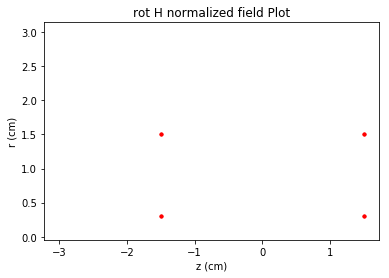

In [113]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
ax.quiver(za_grid,ra_grid,u_norm,v_norm)
ax.set_title('rot H normalized field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()